In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)  #to display all the columns

In [2]:
data=pd.read_csv('test.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard        NaN   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [3]:
#finding the null values in all the columns
null_val=[val for val in data.columns if data[val].isnull().sum()>0.2] 
#print(null_val)
for val in null_val:
    print('{} column has {} % of null values'.format(val,np.round(data[val].isnull().mean(), 4)))

MSZoning column has 0.0027 % of null values
LotFrontage column has 0.1556 % of null values
Alley column has 0.9267 % of null values
Utilities column has 0.0014 % of null values
Exterior1st column has 0.0007 % of null values
Exterior2nd column has 0.0007 % of null values
MasVnrType column has 0.6127 % of null values
MasVnrArea column has 0.0103 % of null values
BsmtQual column has 0.0302 % of null values
BsmtCond column has 0.0308 % of null values
BsmtExposure column has 0.0302 % of null values
BsmtFinType1 column has 0.0288 % of null values
BsmtFinSF1 column has 0.0007 % of null values
BsmtFinType2 column has 0.0288 % of null values
BsmtFinSF2 column has 0.0007 % of null values
BsmtUnfSF column has 0.0007 % of null values
TotalBsmtSF column has 0.0007 % of null values
BsmtFullBath column has 0.0014 % of null values
BsmtHalfBath column has 0.0014 % of null values
KitchenQual column has 0.0007 % of null values
Functional column has 0.0014 % of null values
FireplaceQu column has 0.5003 % 

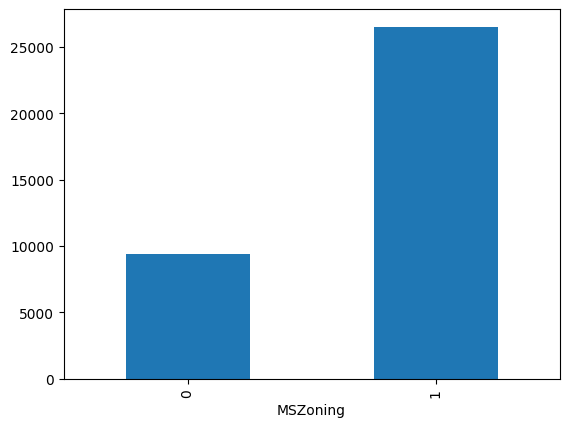

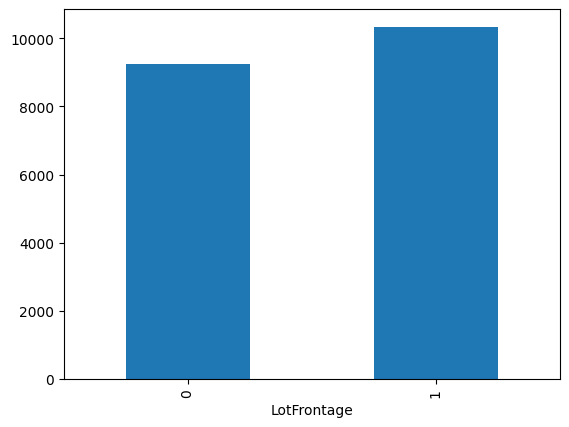

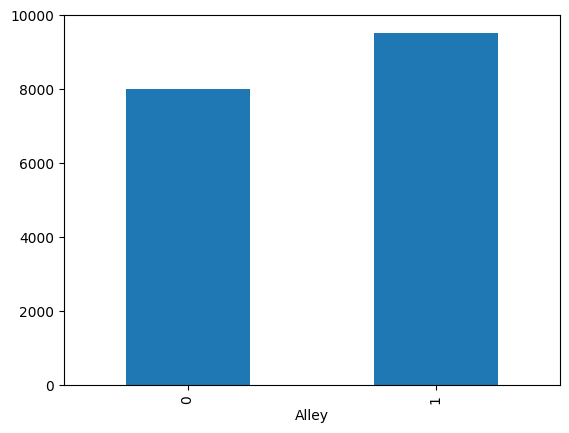

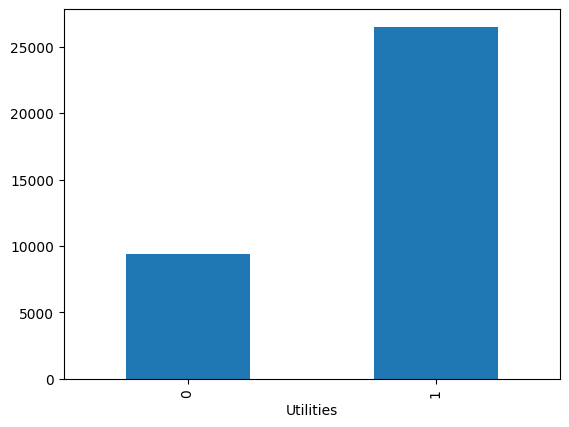

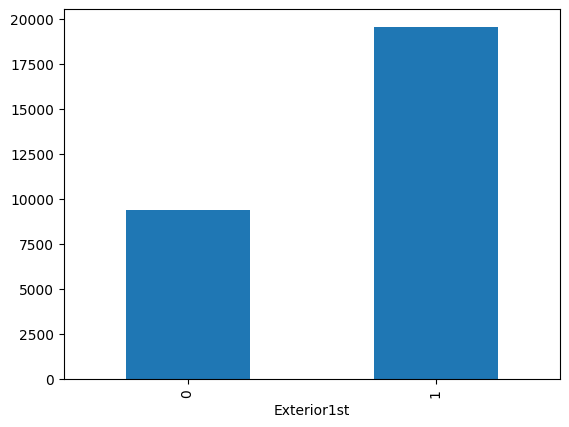

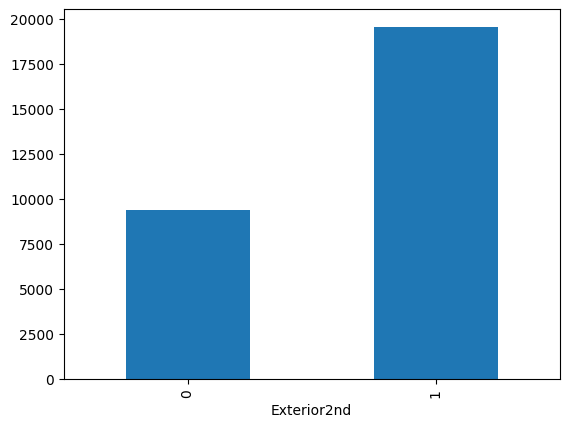

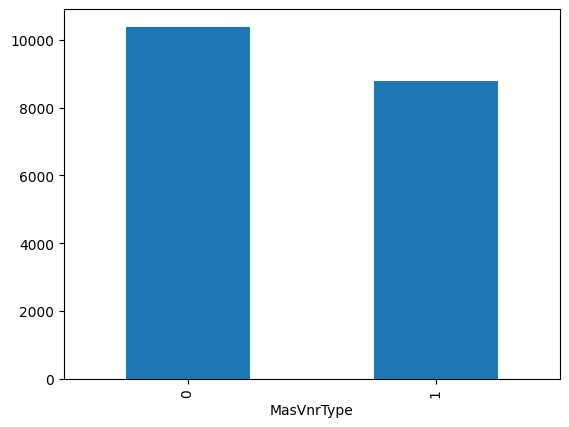

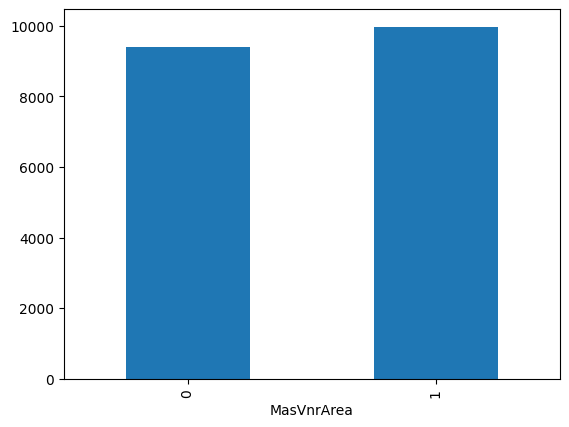

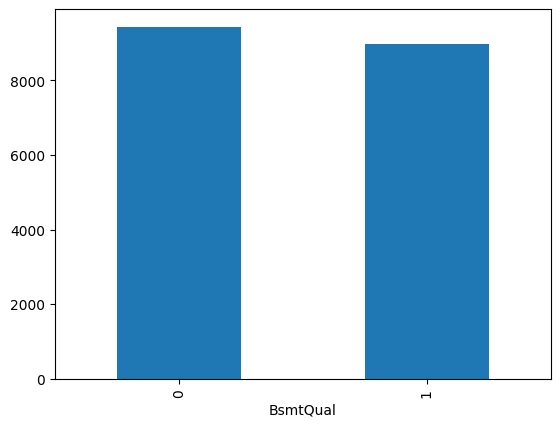

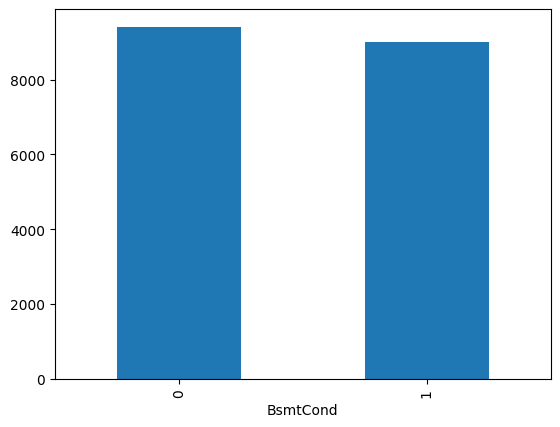

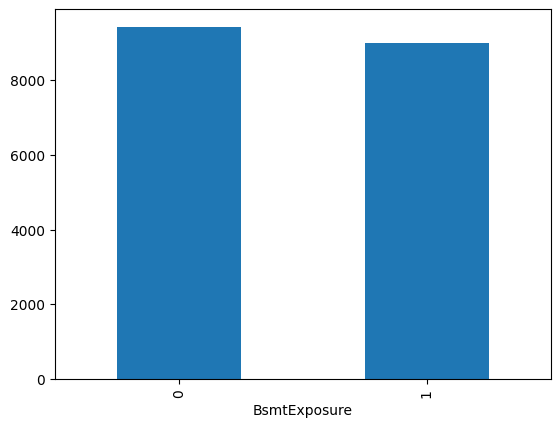

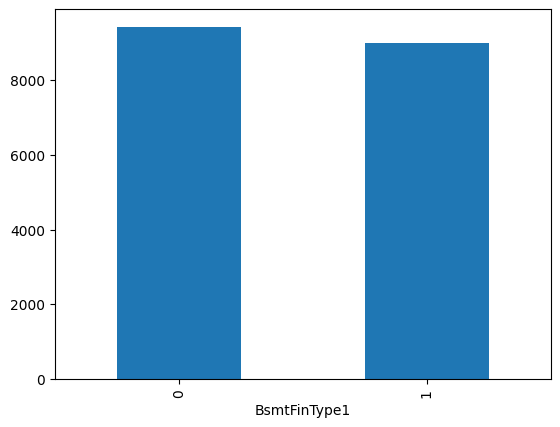

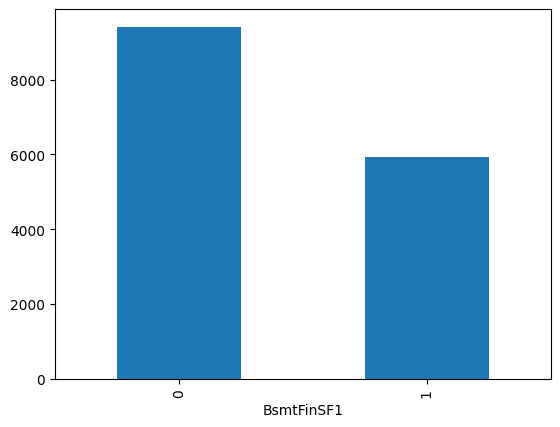

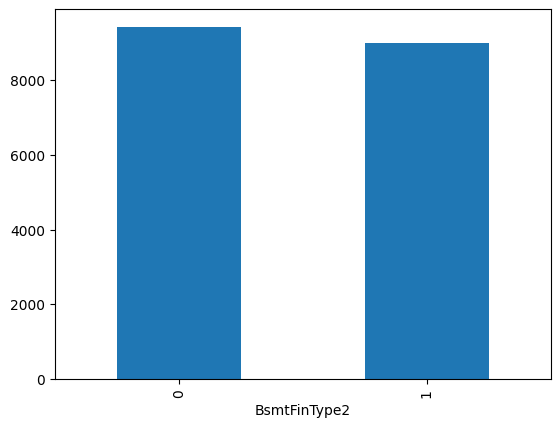

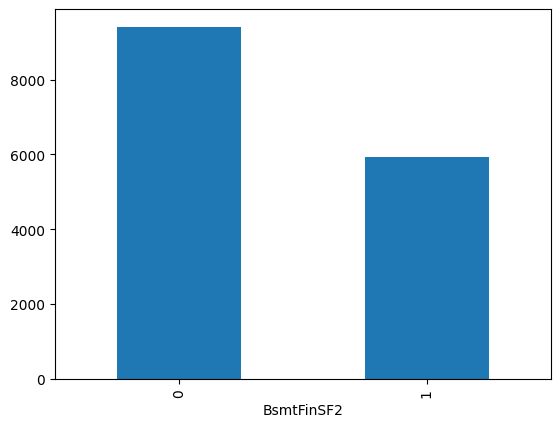

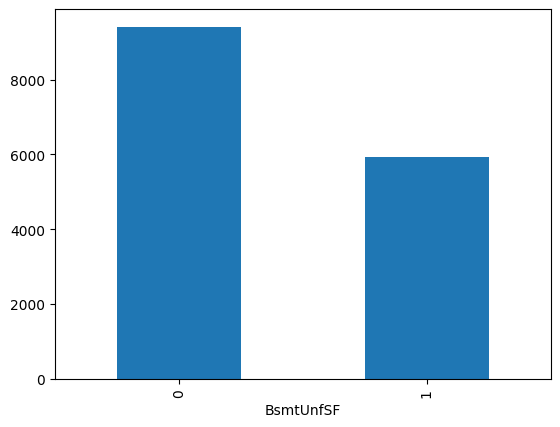

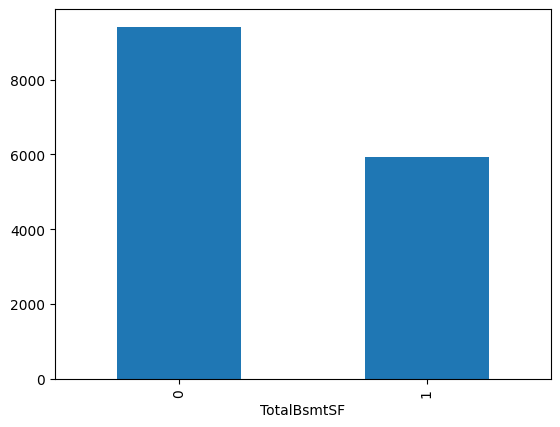

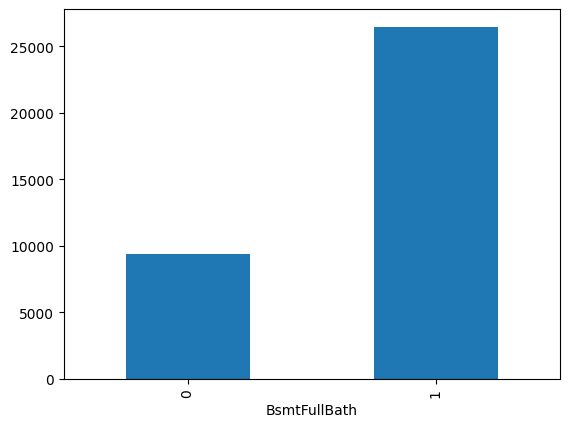

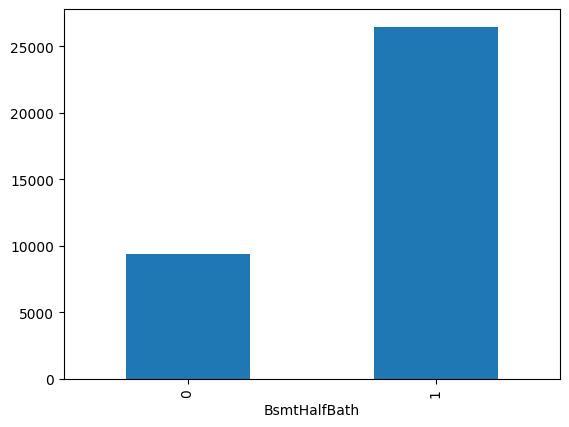

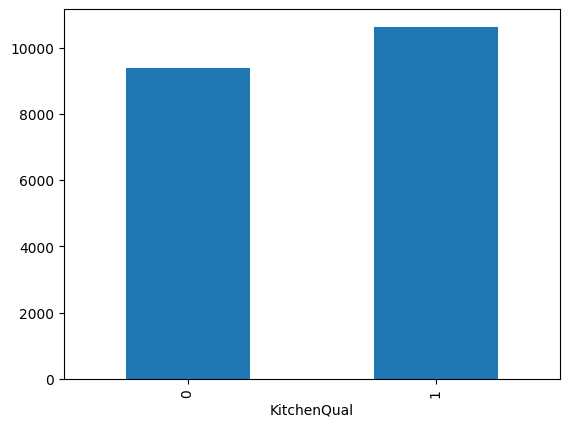

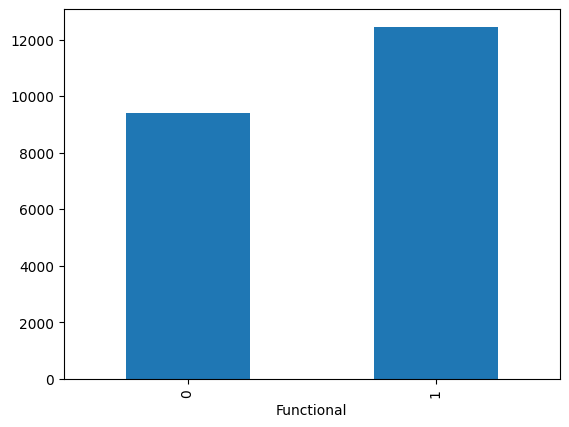

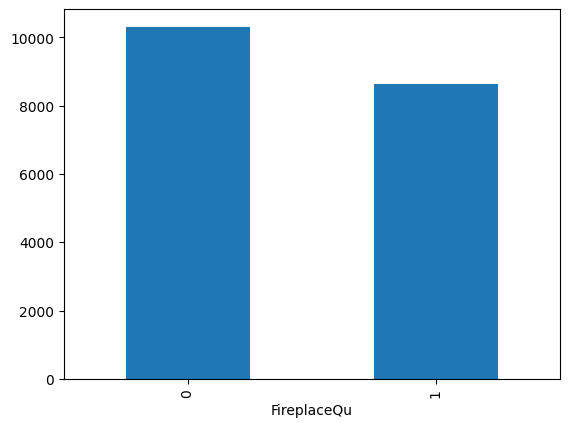

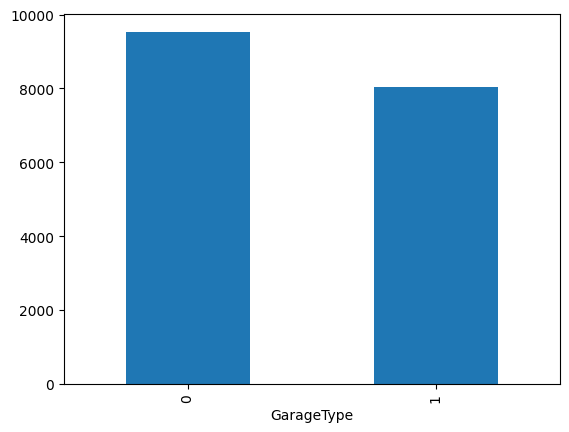

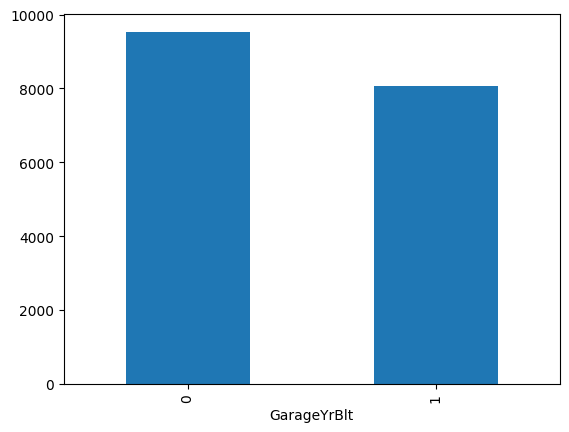

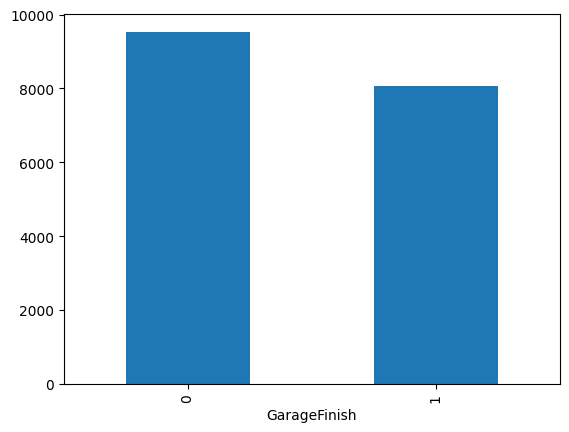

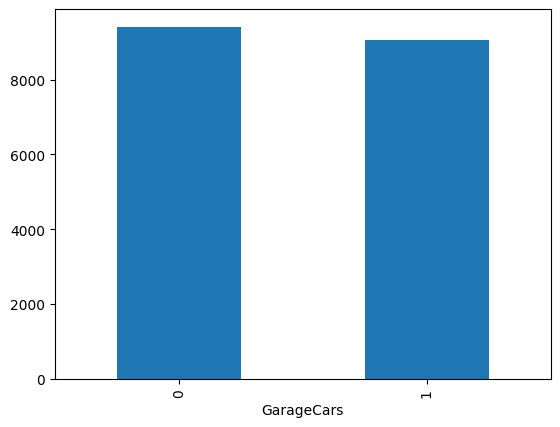

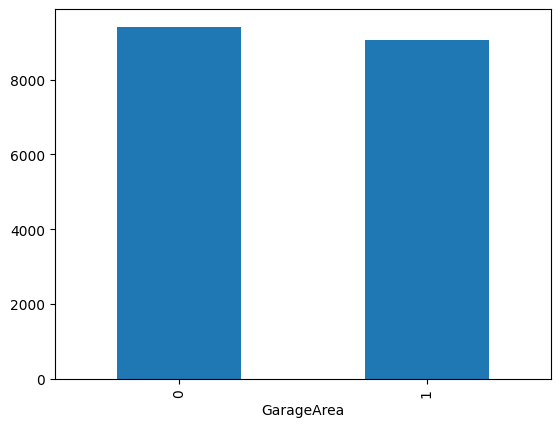

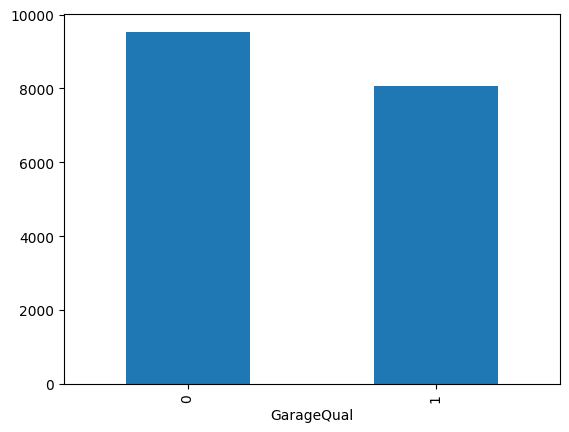

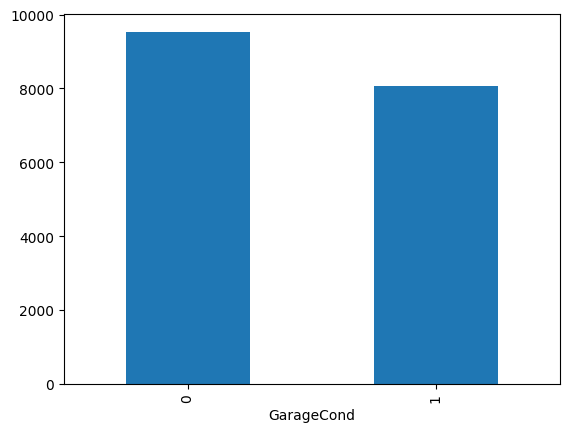

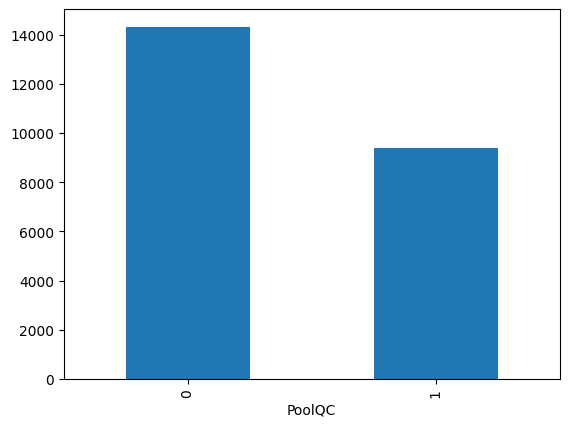

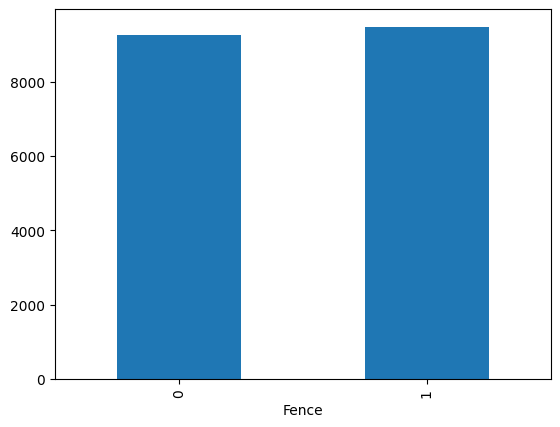

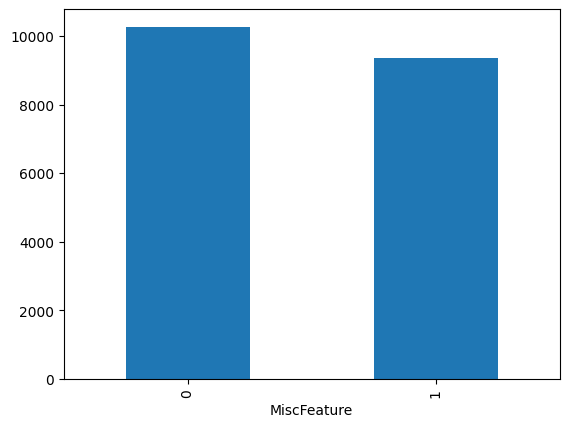

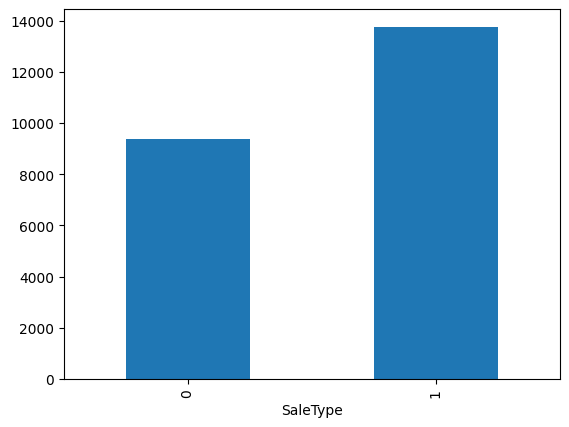

In [4]:
for val in null_val:
    temp_dataset=data.copy()
    temp_dataset[val] = np.where(temp_dataset[val].isnull(), 1, 0)
    temp_dataset.groupby(val)['LotArea'].median().plot.bar()
    plt.show()

In [5]:
#calculating which are the numerical values in the dataset
num_val=[val for val in data.columns if data[val].dtypes!='O' and val not in 'Id']
print(num_val)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


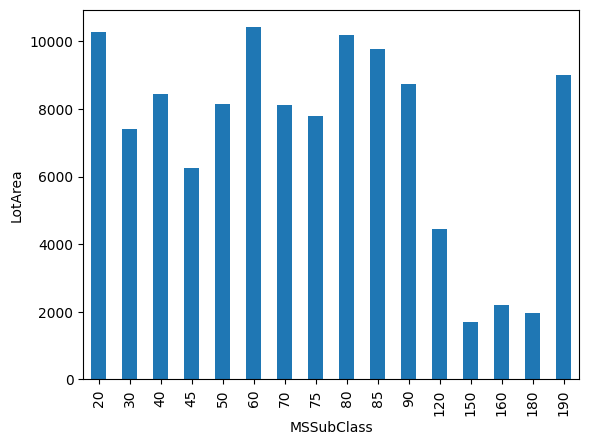

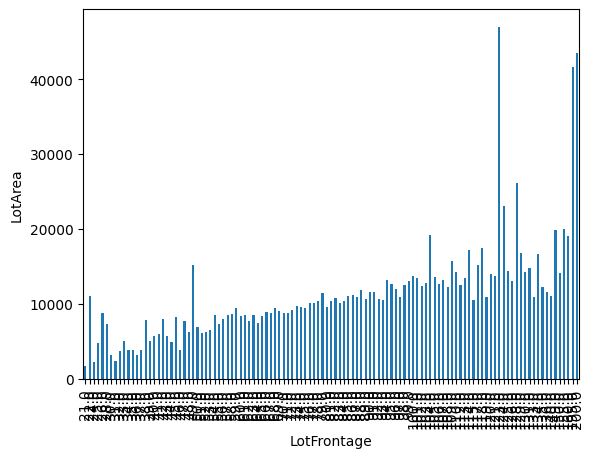

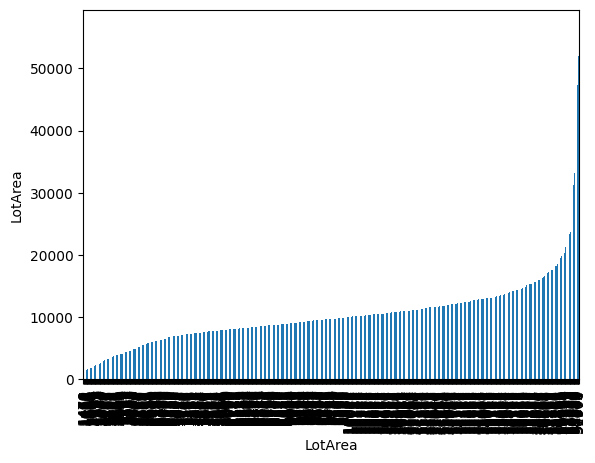

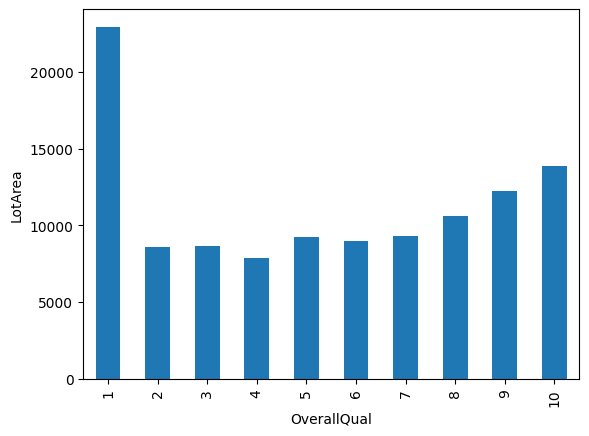

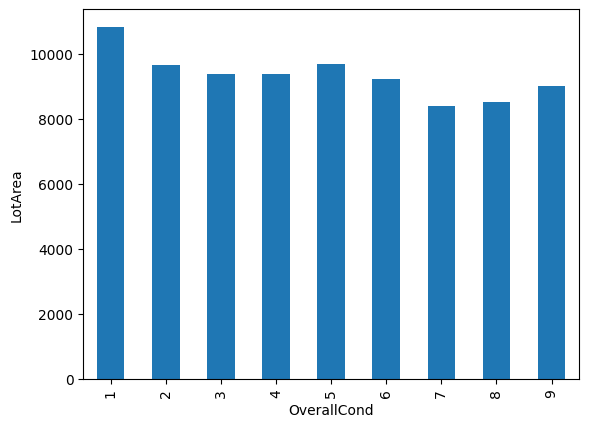

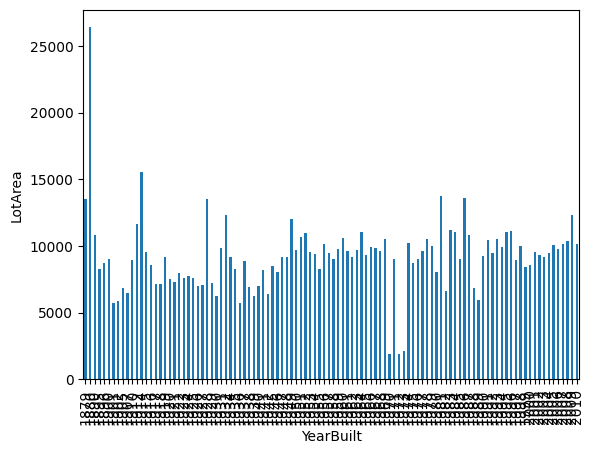

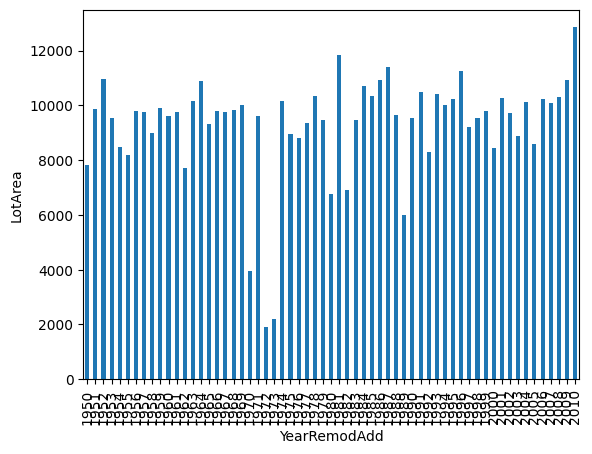

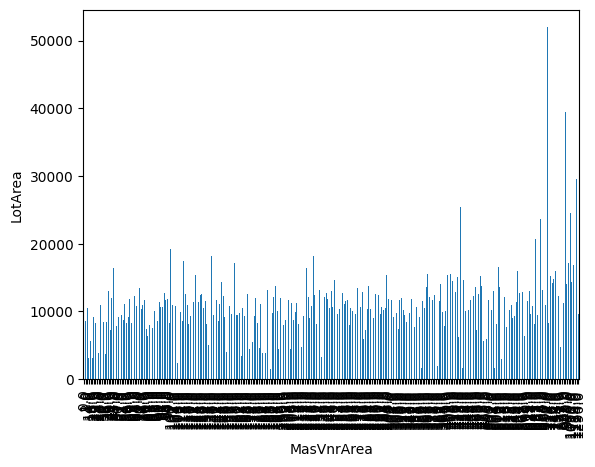

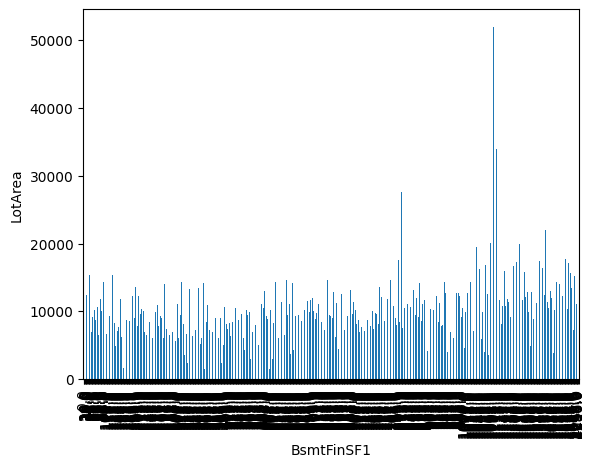

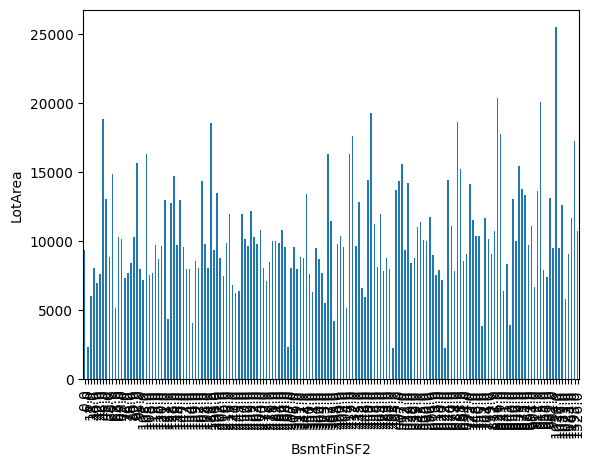

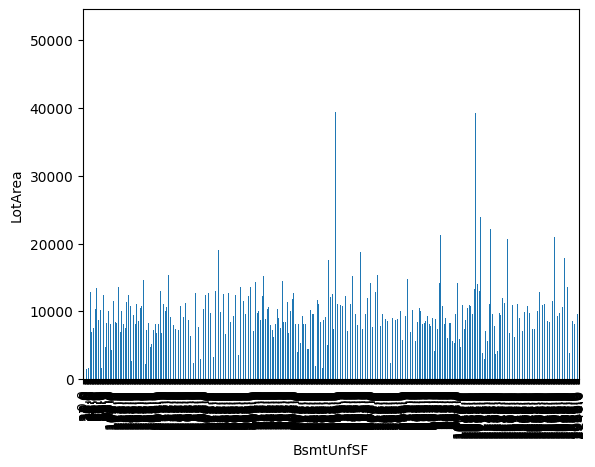

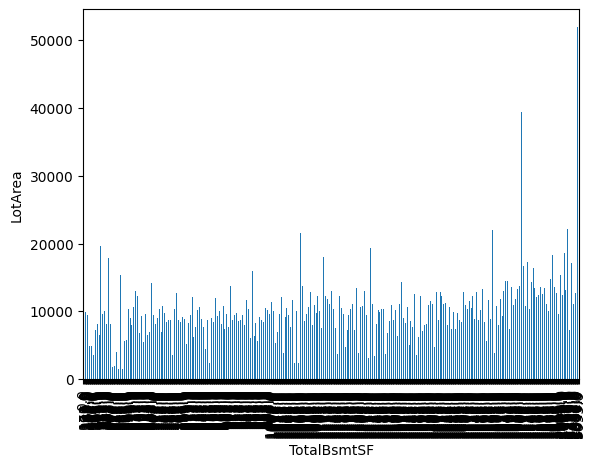

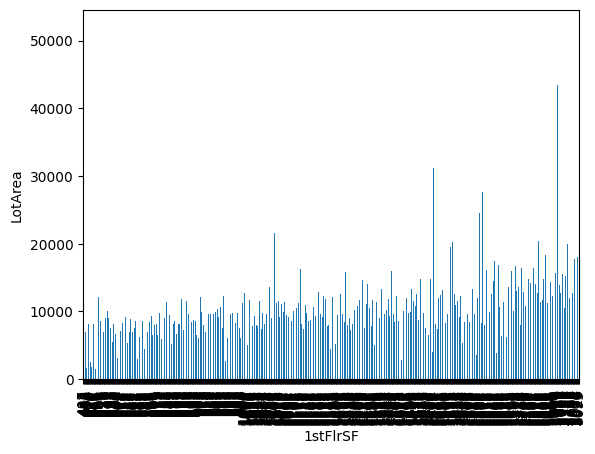

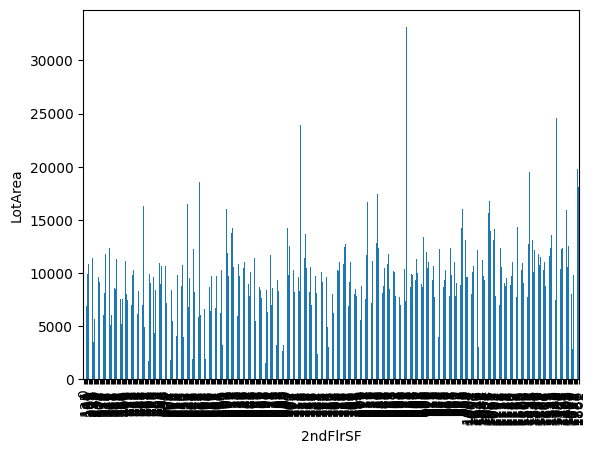

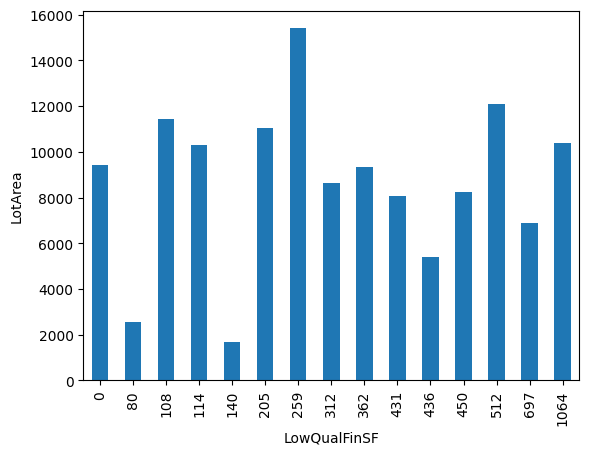

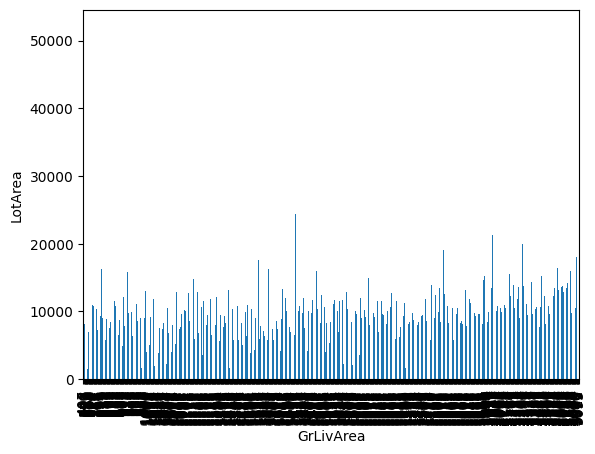

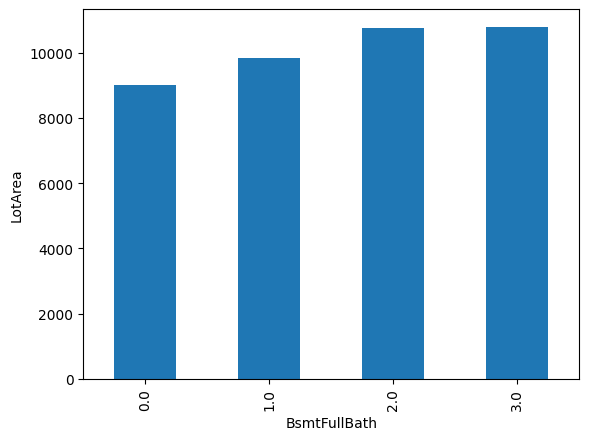

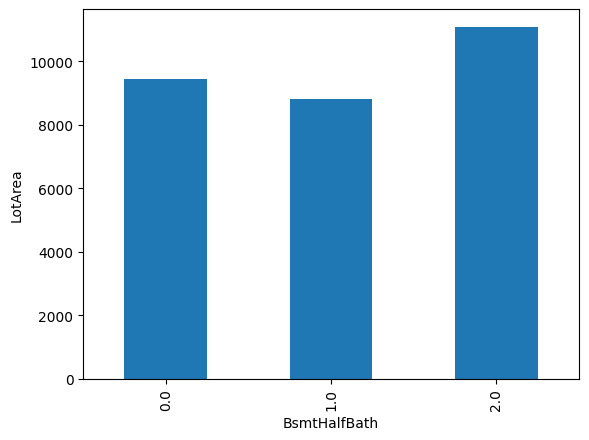

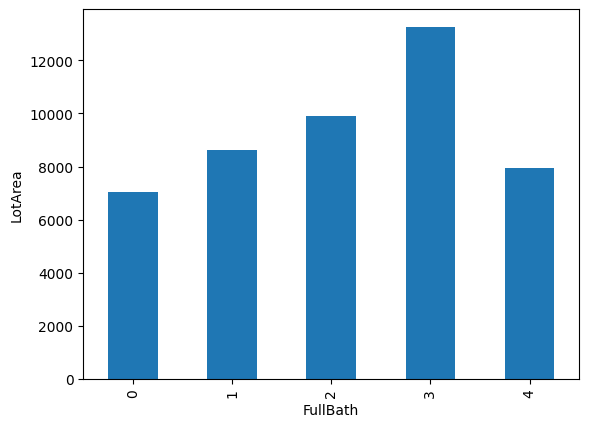

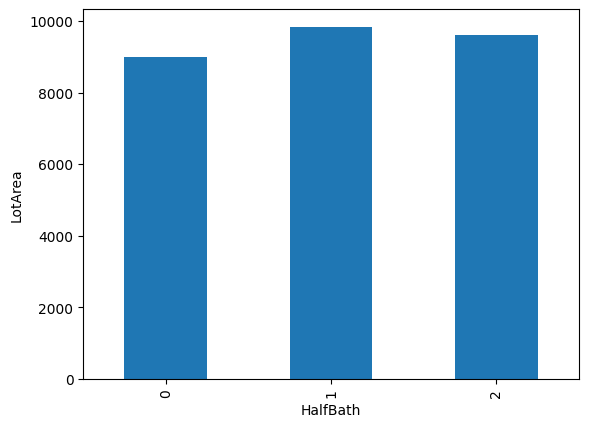

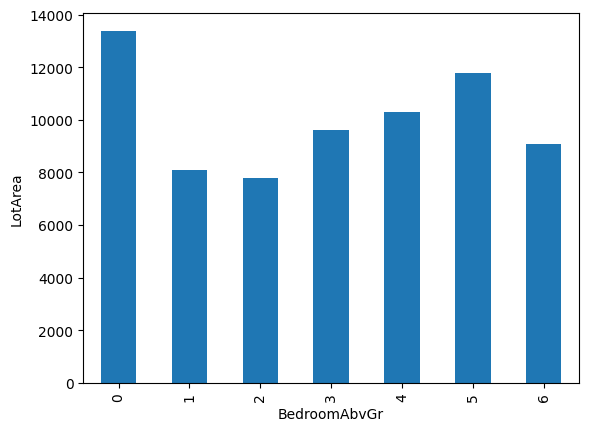

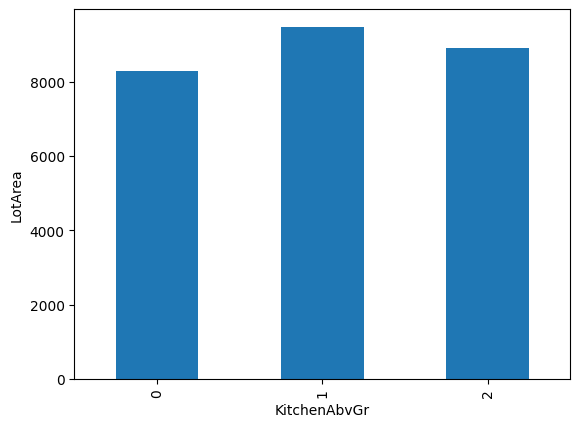

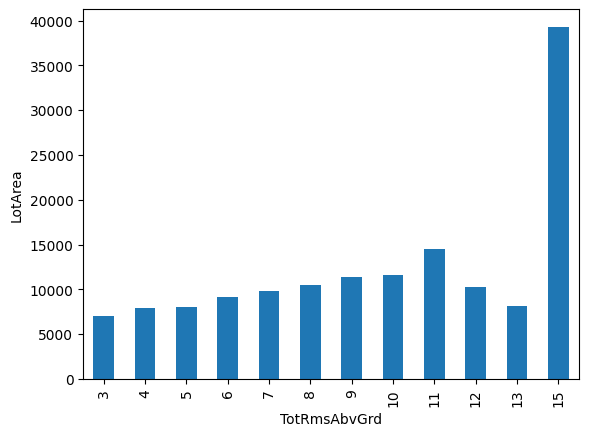

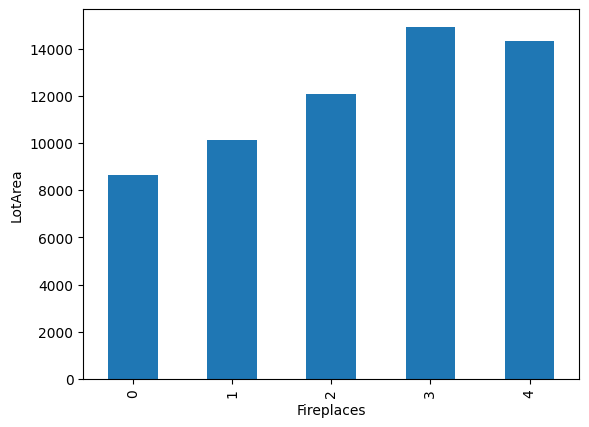

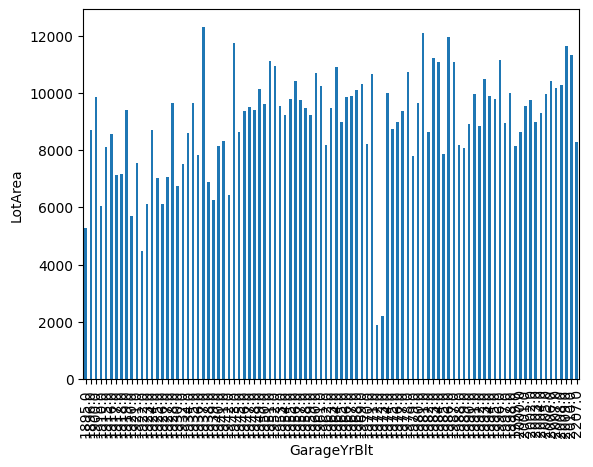

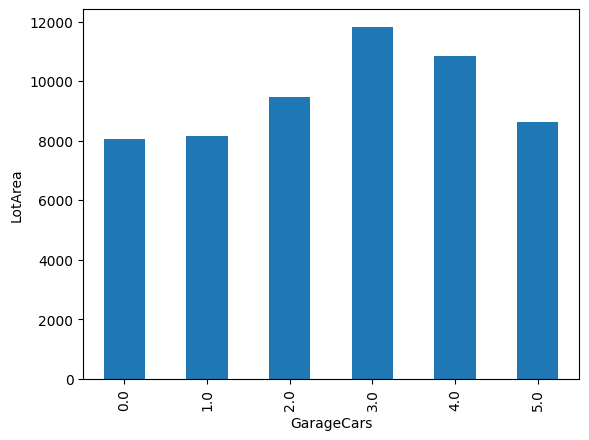

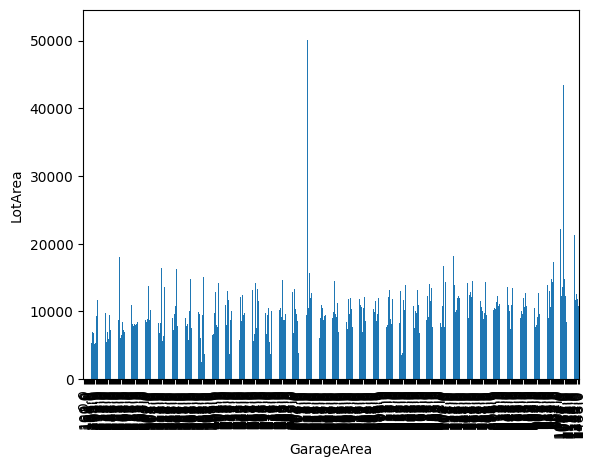

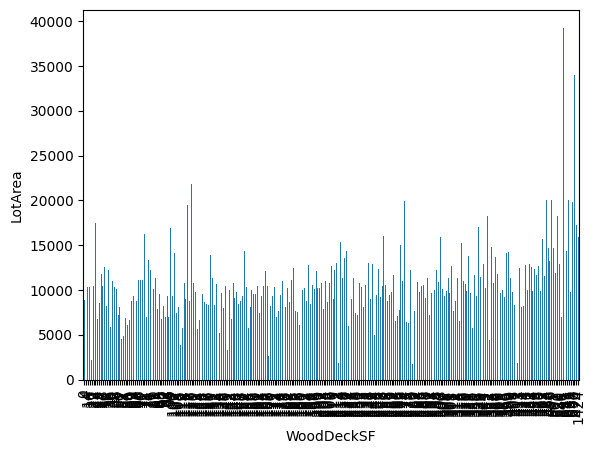

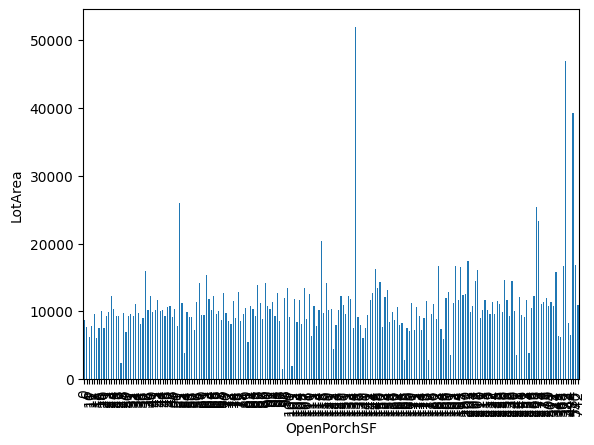

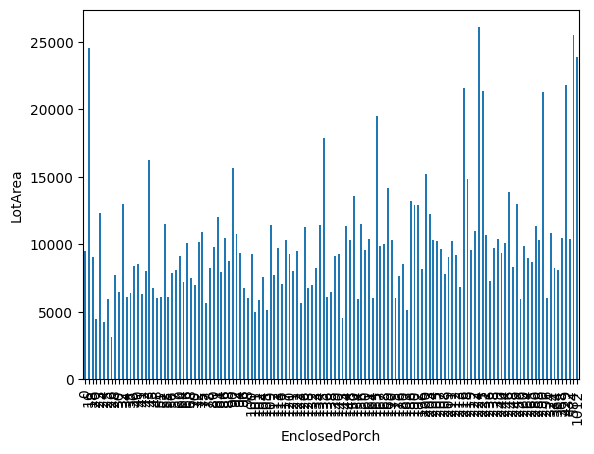

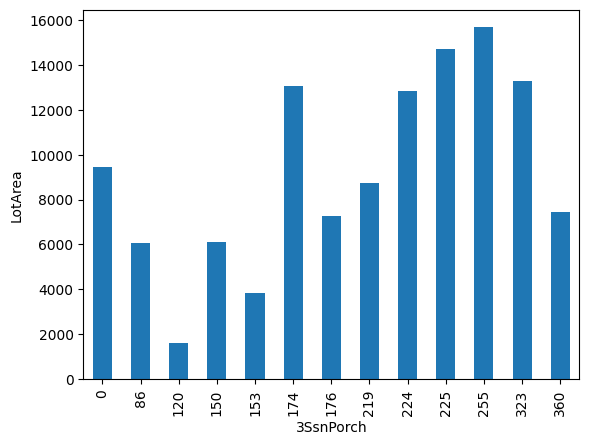

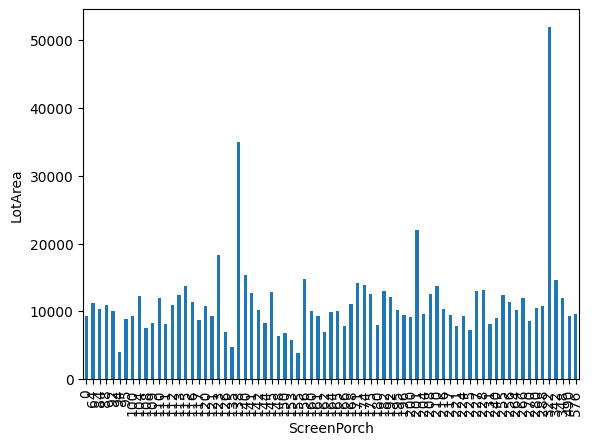

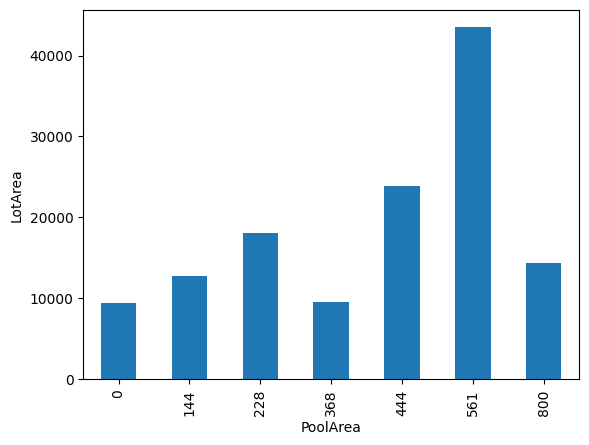

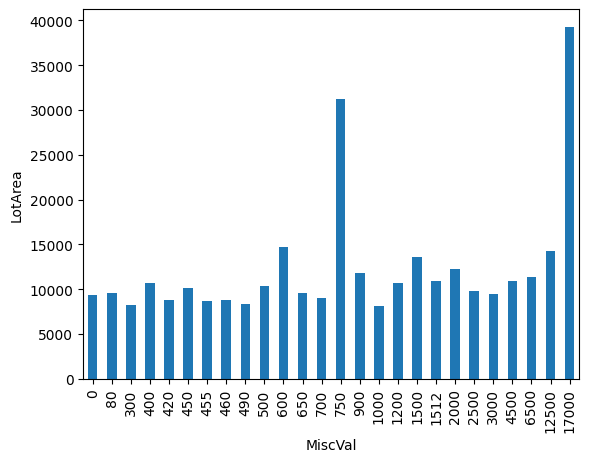

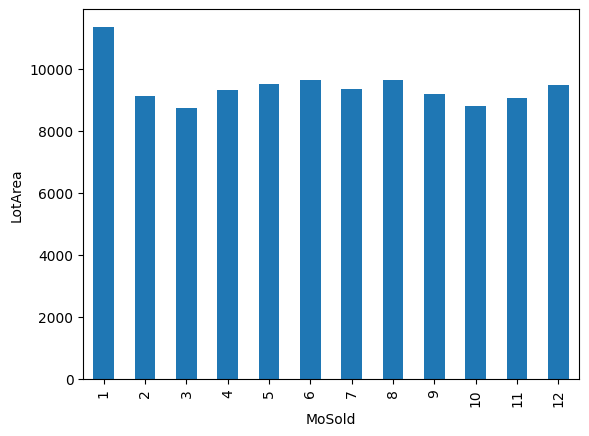

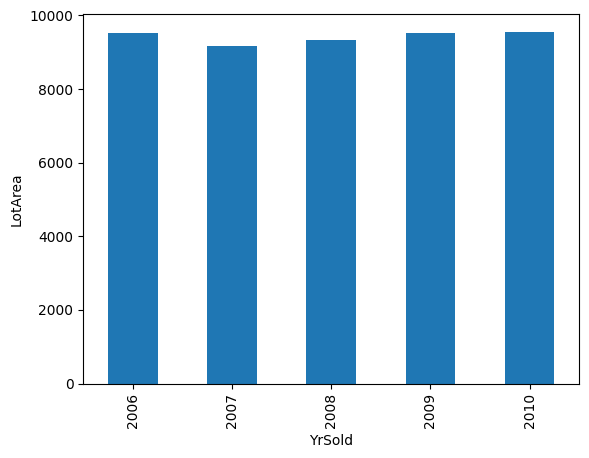

In [6]:
for val in num_val:
    data.groupby(val)['LotArea'].median().plot.bar()
    plt.xlabel(val)
    plt.ylabel('LotArea')
    plt.show()

In [9]:
#calculating the % of null values in numerical values
num_null_val=[val for val in data.columns if data[val].dtypes!='O' and val not in 'Id' and data[val].isnull().sum()>0.2]
for val in num_null_val:
    print('{} has {}% null values'.format(val,np.round(data[val].isnull().mean(),4)))

LotFrontage has 0.1556% null values
MasVnrArea has 0.0103% null values
BsmtFinSF1 has 0.0007% null values
BsmtFinSF2 has 0.0007% null values
BsmtUnfSF has 0.0007% null values
TotalBsmtSF has 0.0007% null values
BsmtFullBath has 0.0014% null values
BsmtHalfBath has 0.0014% null values
GarageYrBlt has 0.0535% null values
GarageCars has 0.0007% null values
GarageArea has 0.0007% null values


In [10]:
#finding which are the catagorical values
cat_val=[val for val in data.columns if data[val].dtypes=='O']
print(cat_val)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


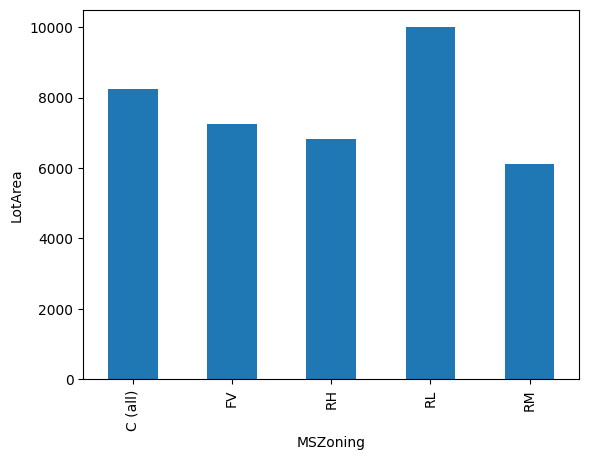

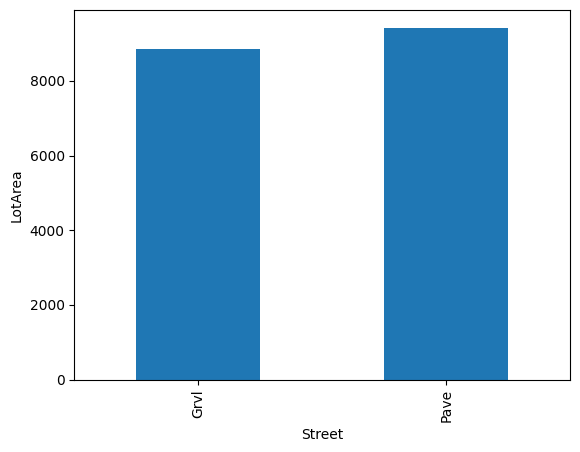

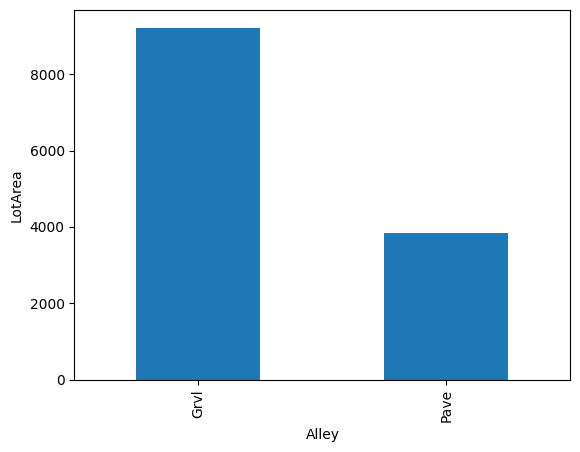

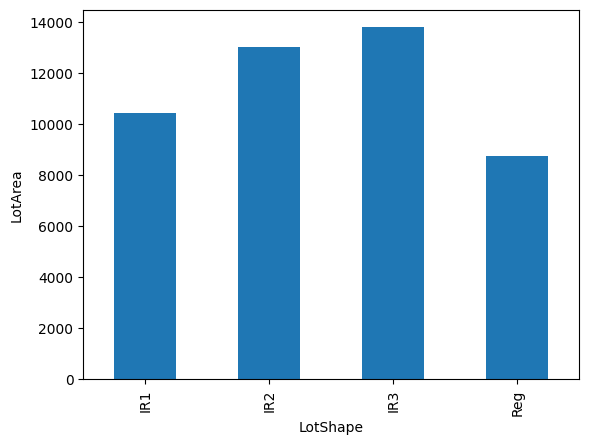

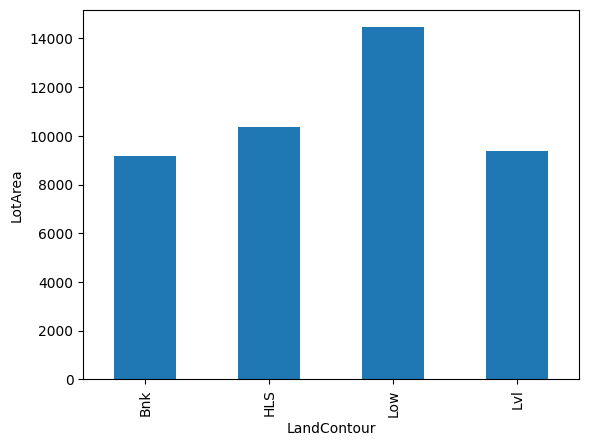

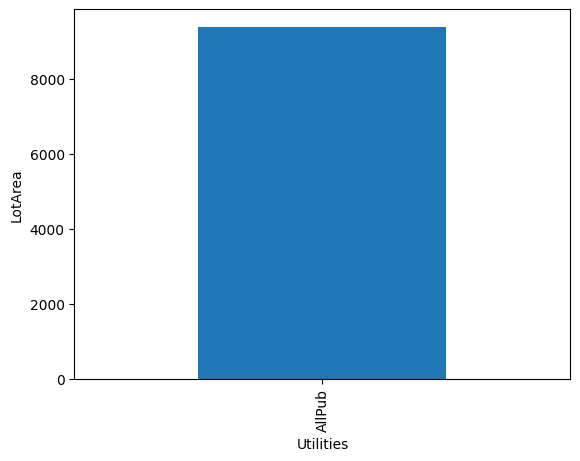

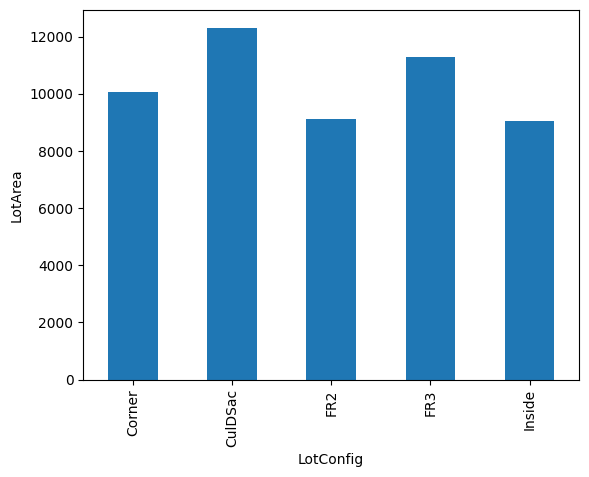

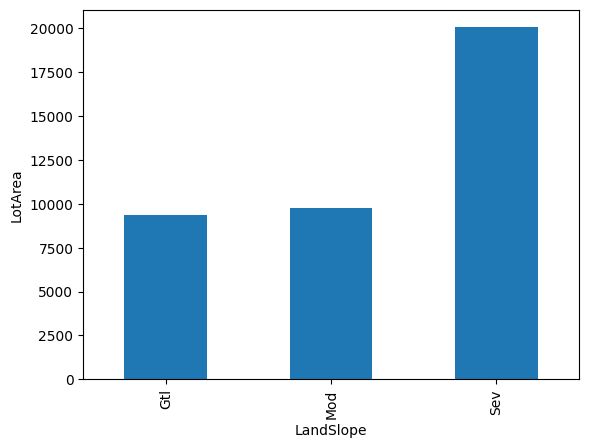

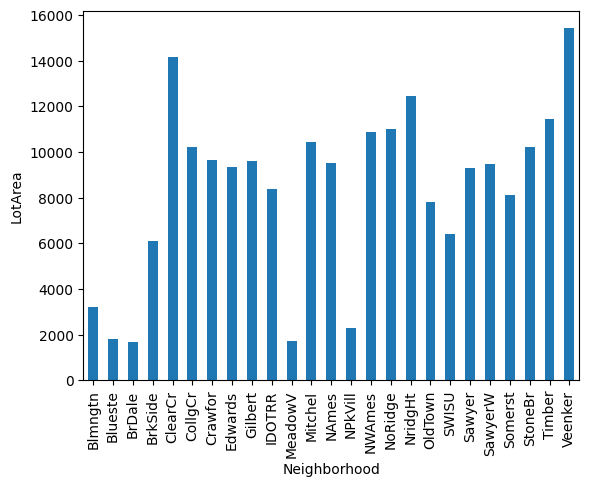

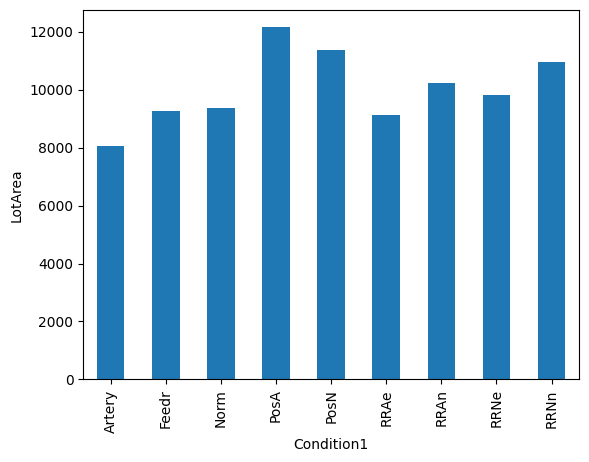

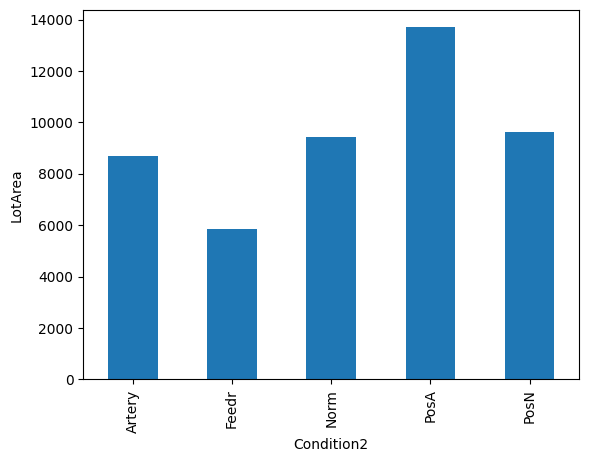

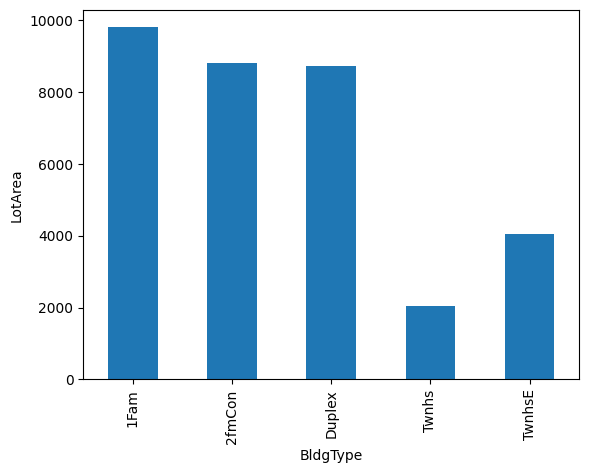

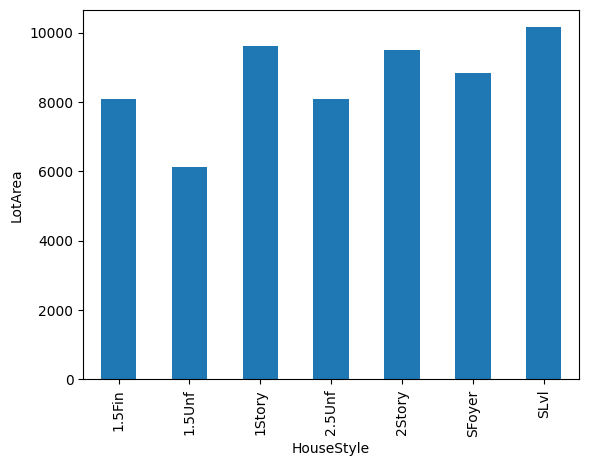

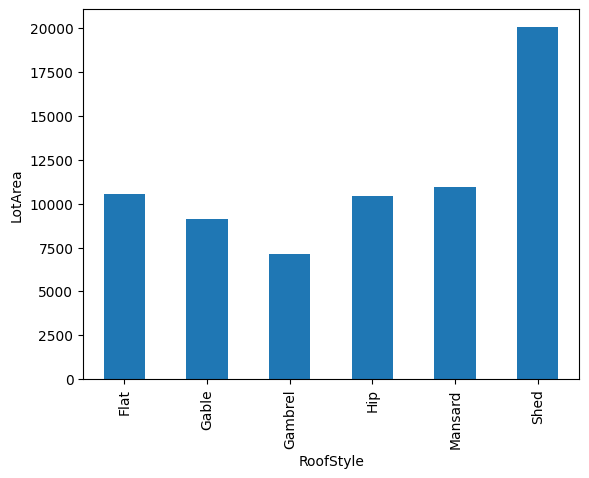

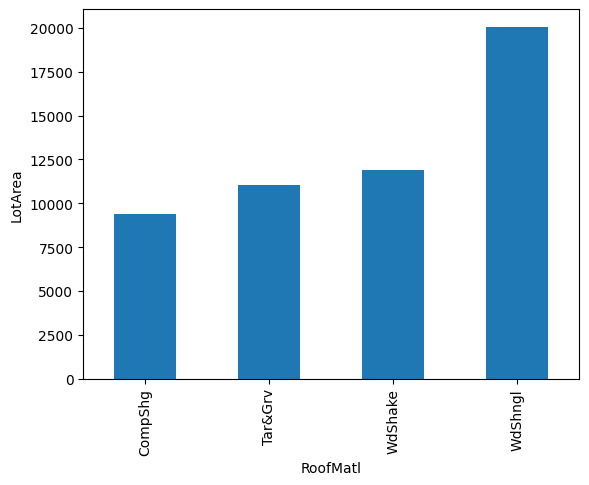

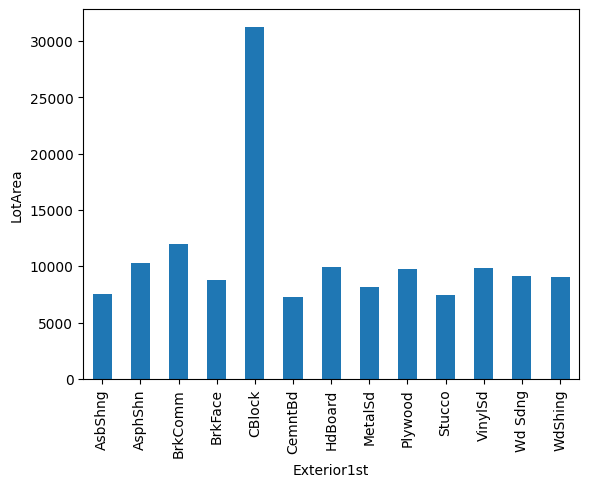

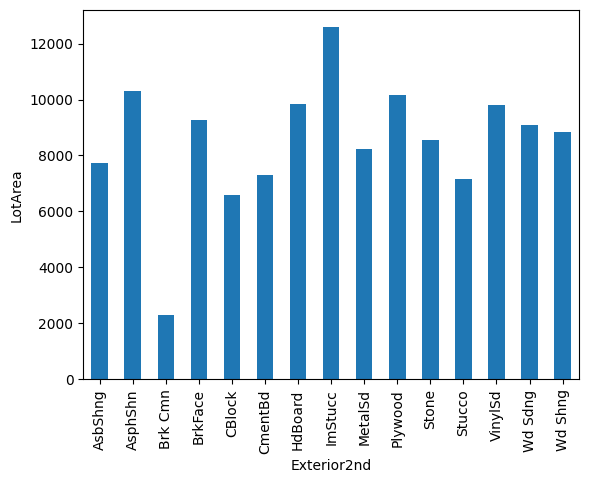

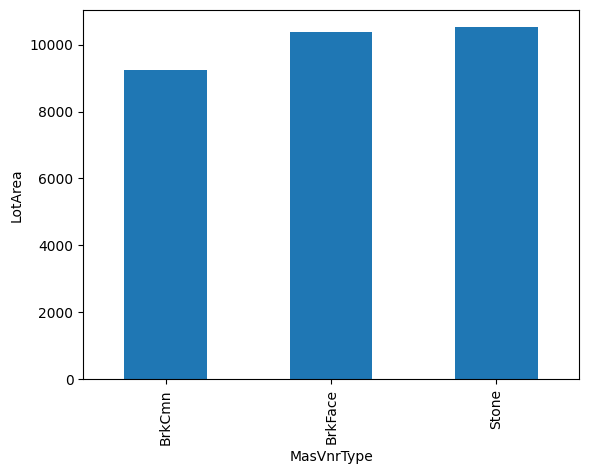

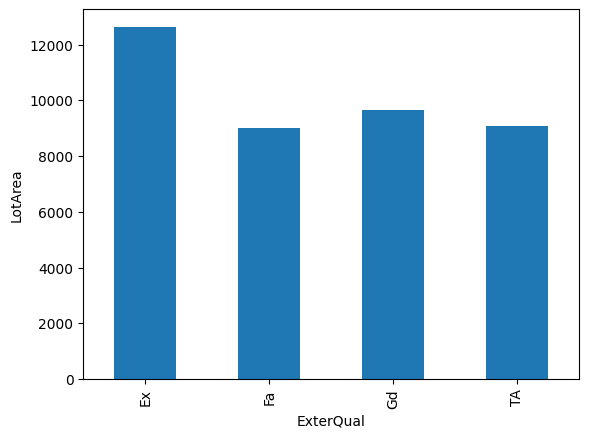

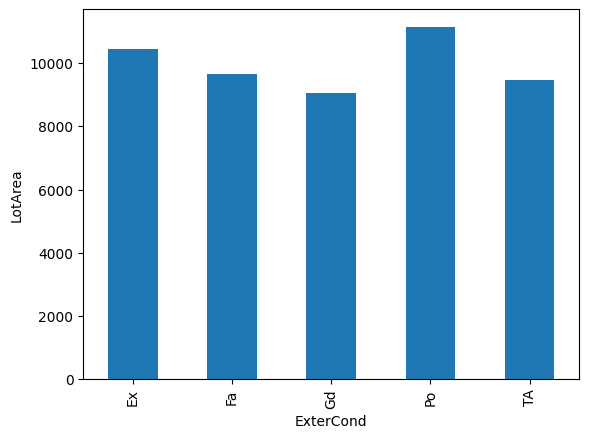

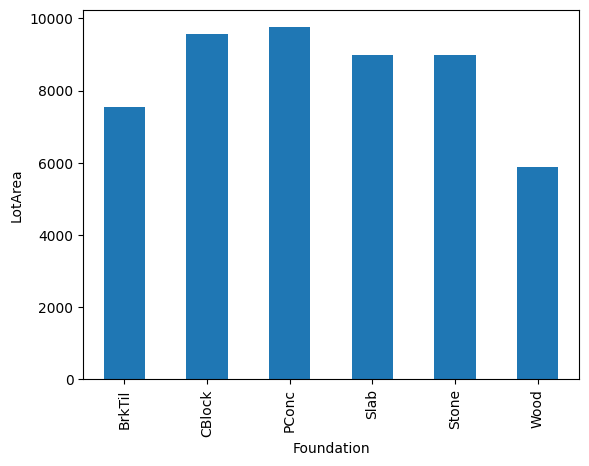

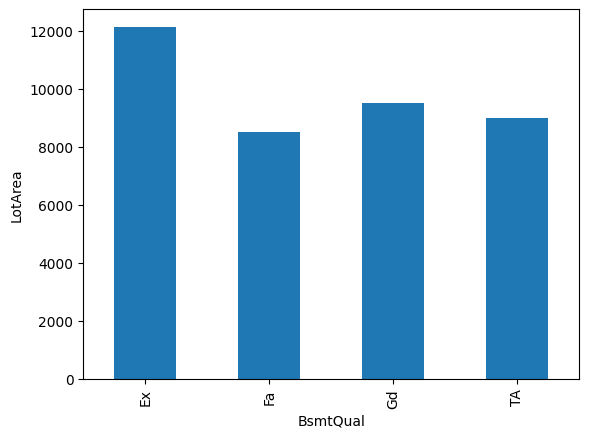

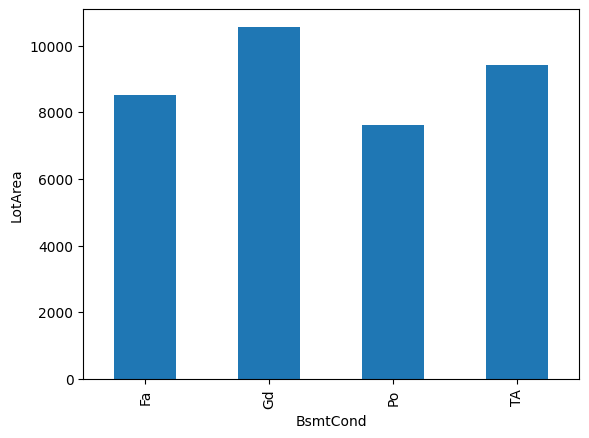

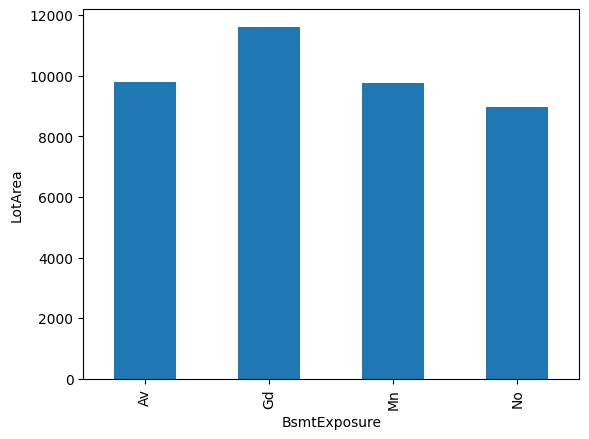

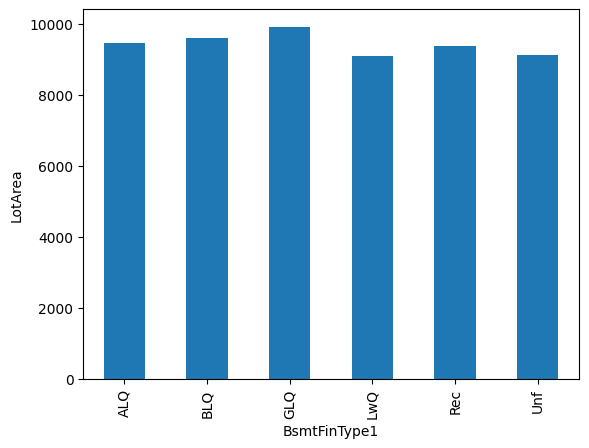

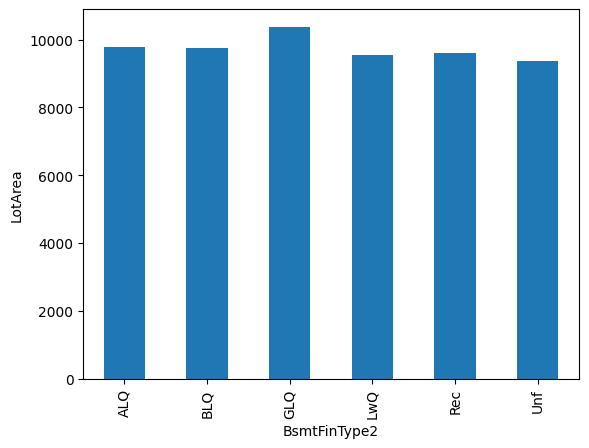

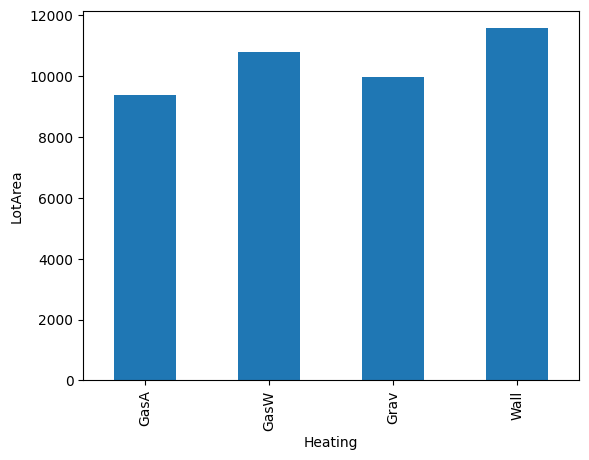

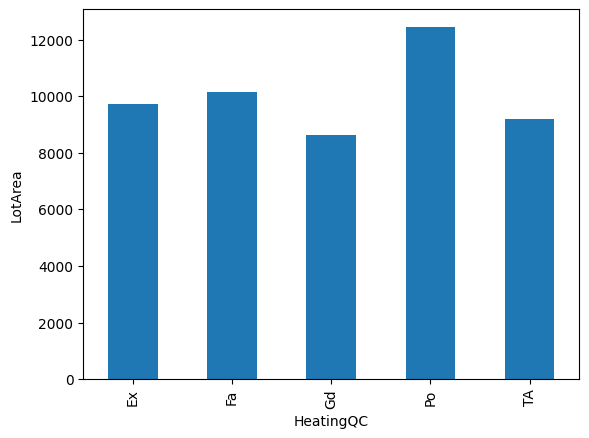

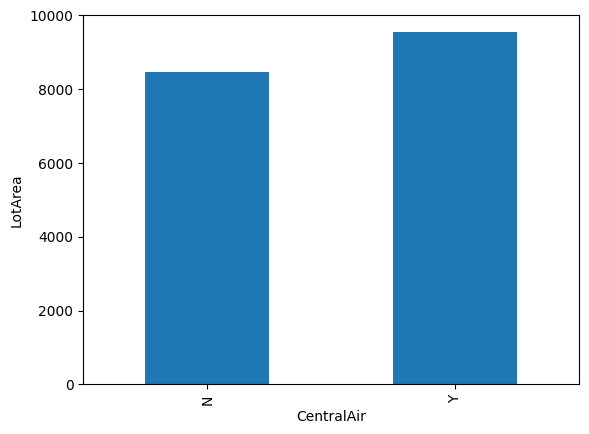

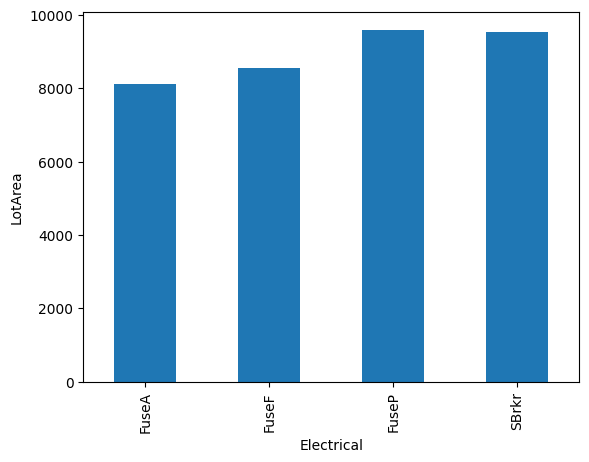

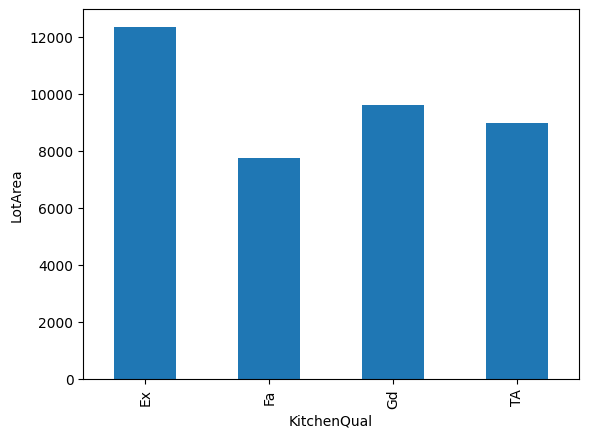

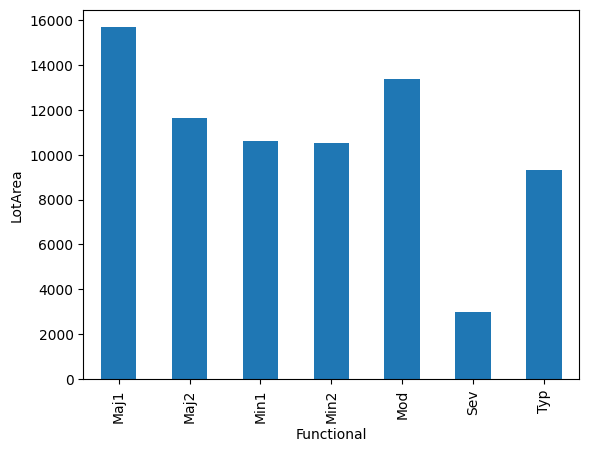

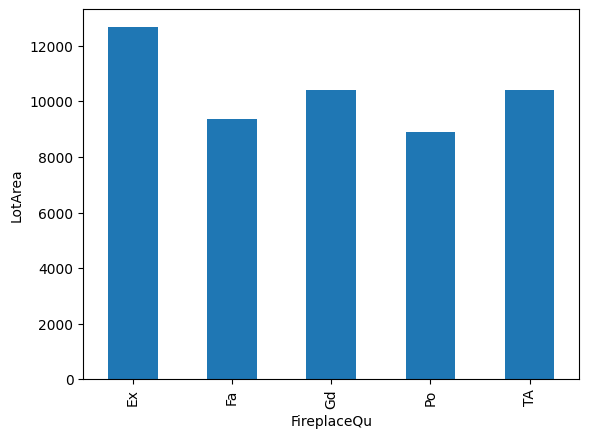

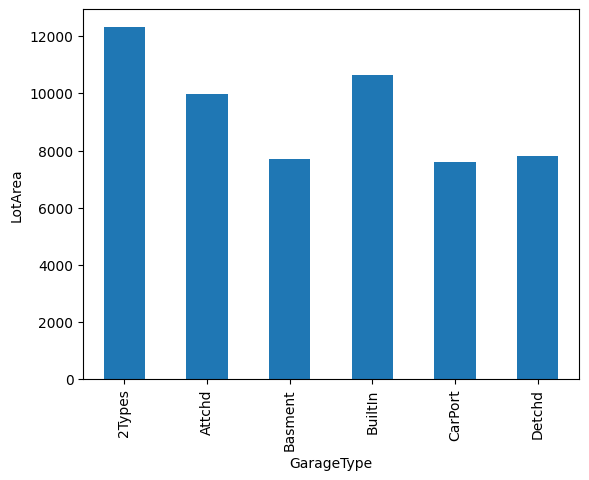

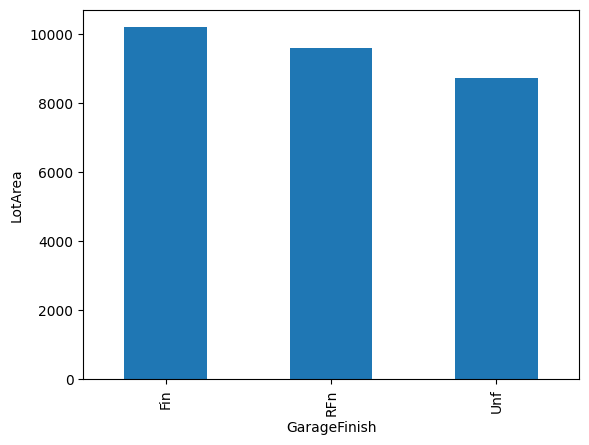

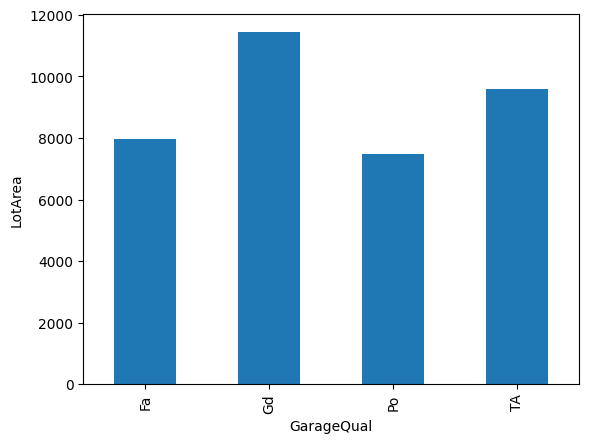

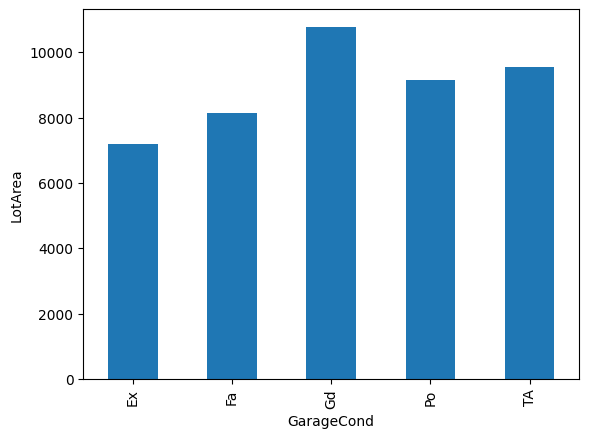

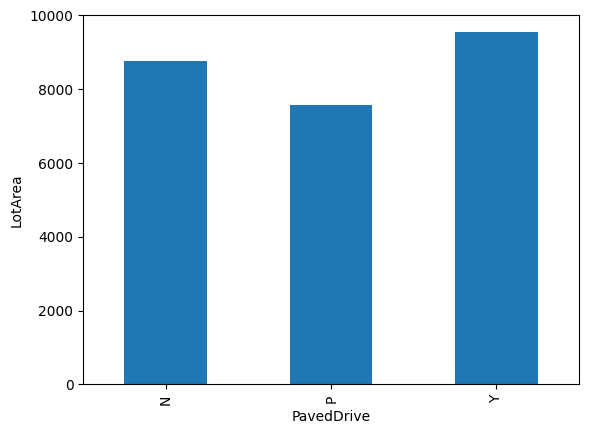

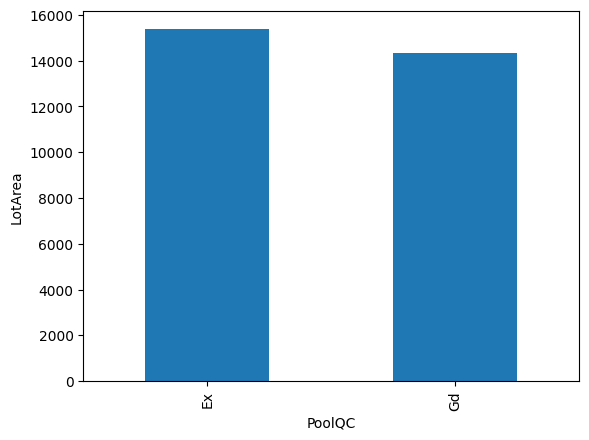

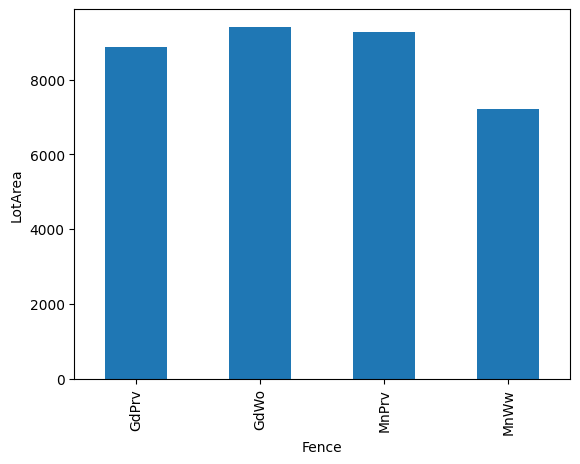

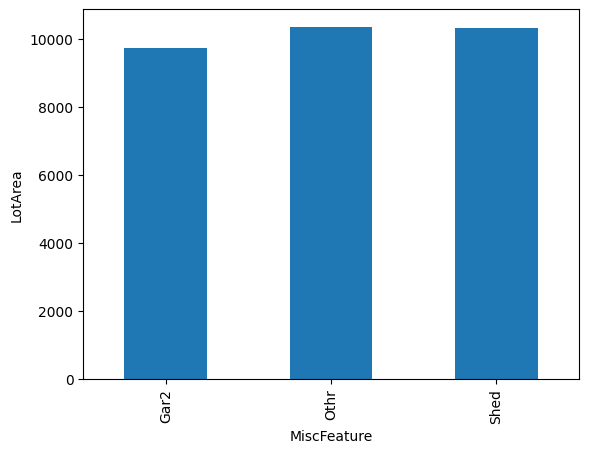

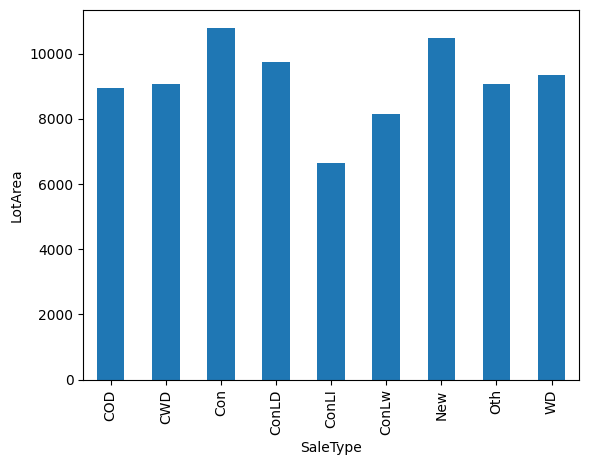

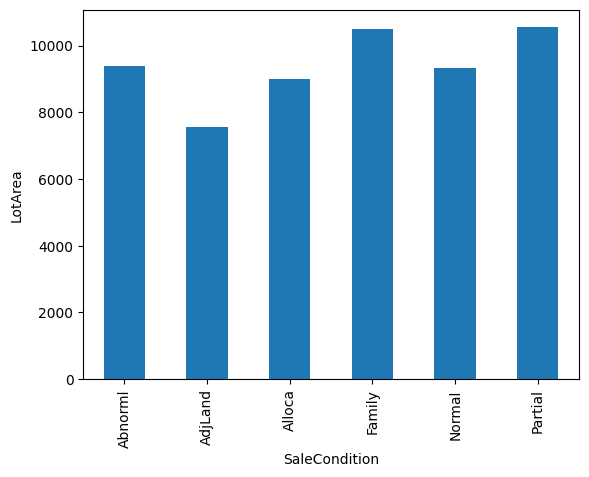

In [11]:
for val in cat_val:
    data.groupby(val)['LotArea'].median().plot.bar()
    plt.xlabel(val)
    plt.ylabel('LotArea')
    plt.show()

In [12]:
#null in catagorical values
cat_null_val=[val for val in data.columns if data[val].dtypes=='O' and data[val].isnull().sum()>0.2]
for val in cat_null_val:
    print('{} has {}% null values'.format(val,np.round(data[val].isnull().mean(),4)))

MSZoning has 0.0027% null values
Alley has 0.9267% null values
Utilities has 0.0014% null values
Exterior1st has 0.0007% null values
Exterior2nd has 0.0007% null values
MasVnrType has 0.6127% null values
BsmtQual has 0.0302% null values
BsmtCond has 0.0308% null values
BsmtExposure has 0.0302% null values
BsmtFinType1 has 0.0288% null values
BsmtFinType2 has 0.0288% null values
KitchenQual has 0.0007% null values
Functional has 0.0014% null values
FireplaceQu has 0.5003% null values
GarageType has 0.0521% null values
GarageFinish has 0.0535% null values
GarageQual has 0.0535% null values
GarageCond has 0.0535% null values
PoolQC has 0.9979% null values
Fence has 0.8012% null values
MiscFeature has 0.965% null values
SaleType has 0.0007% null values


In [13]:
#finding the temporal values (Data time values)  __. these change over time
temp_val=[val for val in data.columns if 'Year' in val or 'Yr' in val]
print(temp_val)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [14]:
#exploring the contents of temp_values
for val in temp_val:
    print(val,data[val].unique())

YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]
YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]
GarageYrBlt [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974.

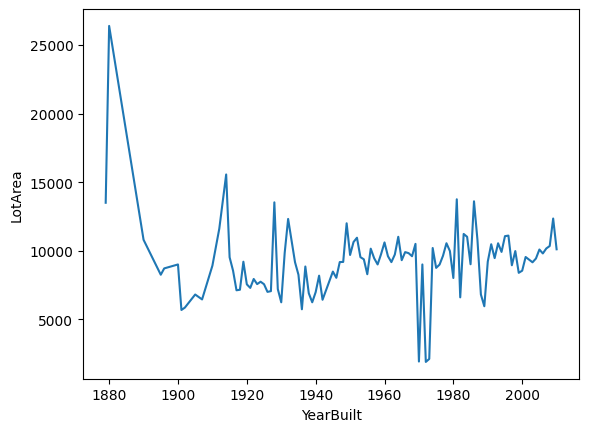

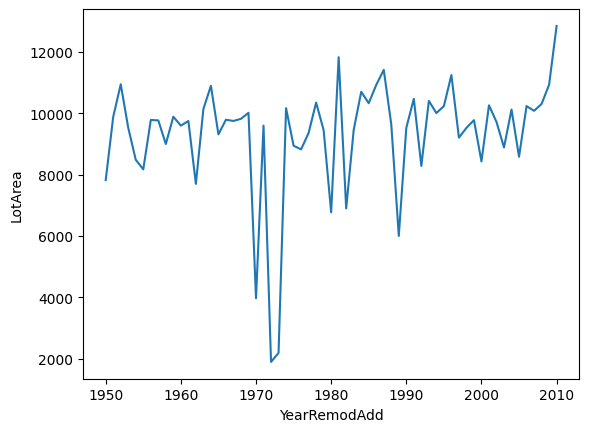

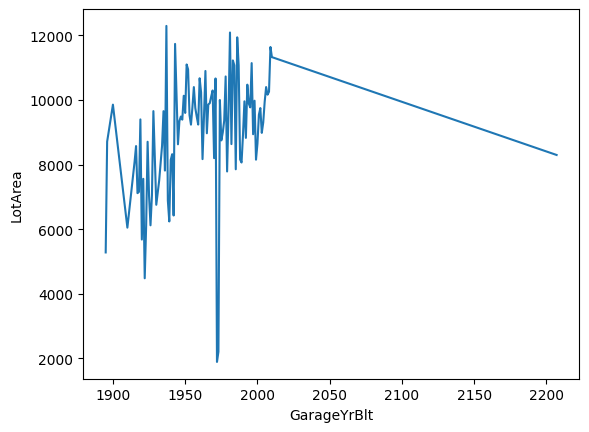

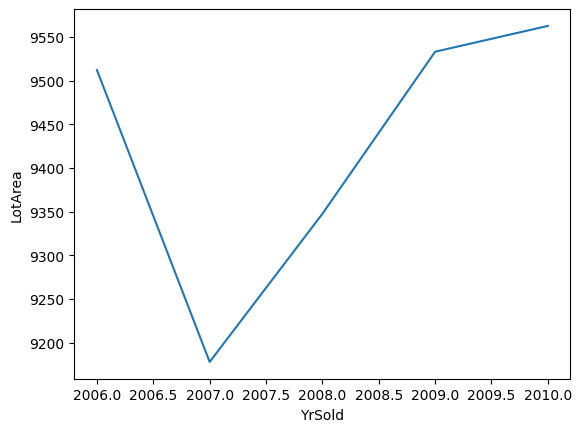

In [15]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price
for val in temp_val:
    data.groupby(val)['LotArea'].median().plot()
    plt.xlabel(val)
    plt.ylabel('LotArea')
    plt.show()

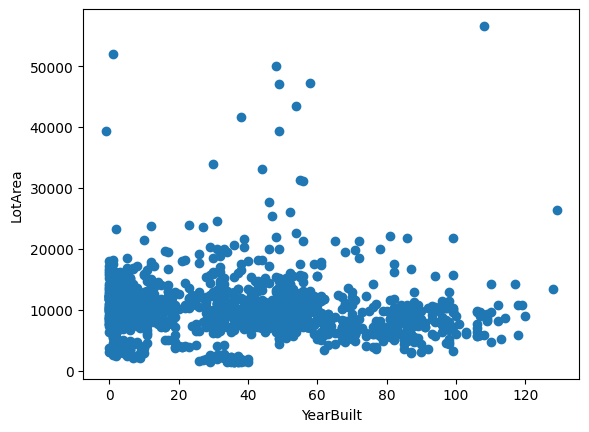

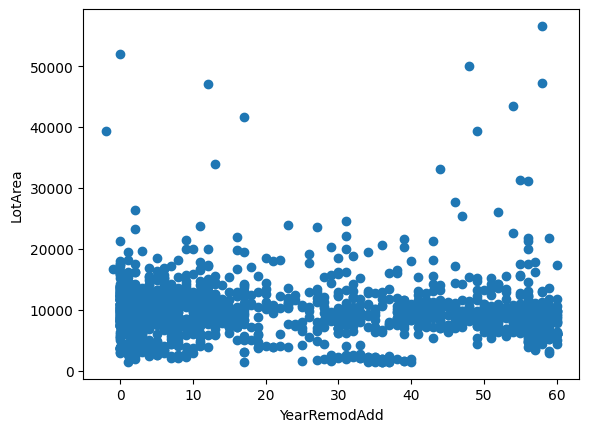

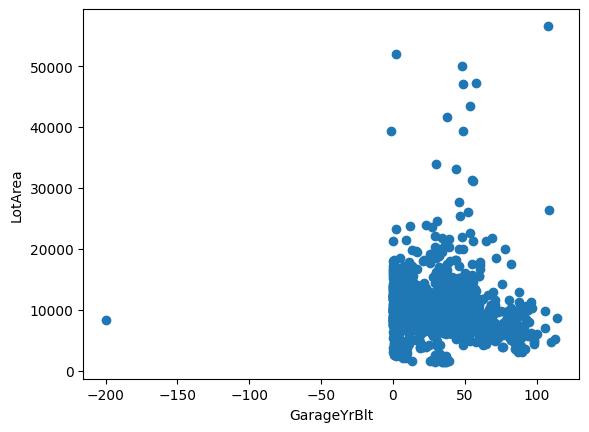

In [16]:
 ## Here we will compare the difference between All years feature with SalePrice

for val in temp_val:
    if val!='YrSold':
        dataset=data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        dataset[val]=dataset['YrSold']-dataset[val]

        plt.scatter(dataset[val],dataset['LotArea'])
        plt.xlabel(val)
        plt.ylabel('LotArea')
        plt.show()

In [17]:
#finding which are the discrete features:
dis_val=[val for val in num_val if len(data[val].unique()) <25 and val not in temp_val]
print(dis_val)
print("Discrete Variables Count: {}".format(len(dis_val)))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
Discrete Variables Count: 16


In [18]:
data[dis_val].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          20            5            6             0           0.0   
1          20            6            6             0           0.0   
2          60            5            5             0           0.0   
3          60            6            6             0           0.0   
4         120            8            5             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MoSold  
0           0         1.0          0         0       6  
1           0         1.0          0         0       6  
2           1         2.0          0         0       3  
3           1         2.0          0         0       6  
4           0         2.0          0         0       1

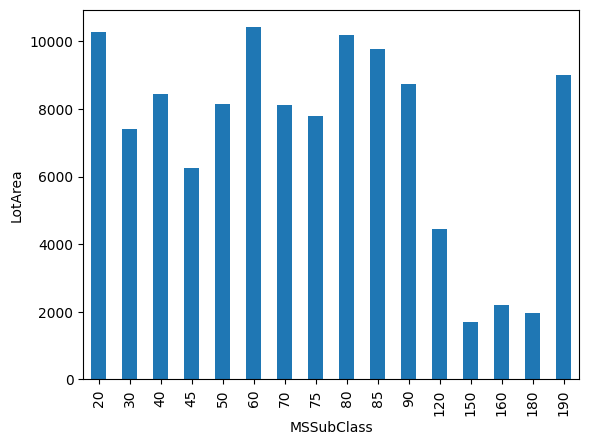

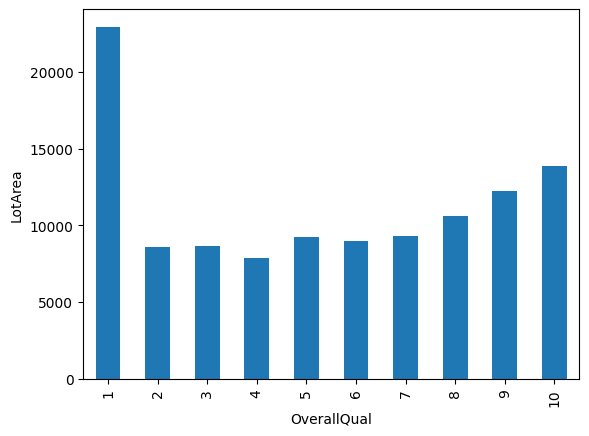

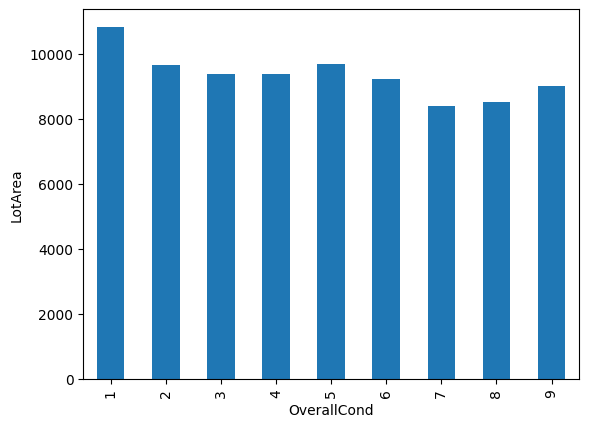

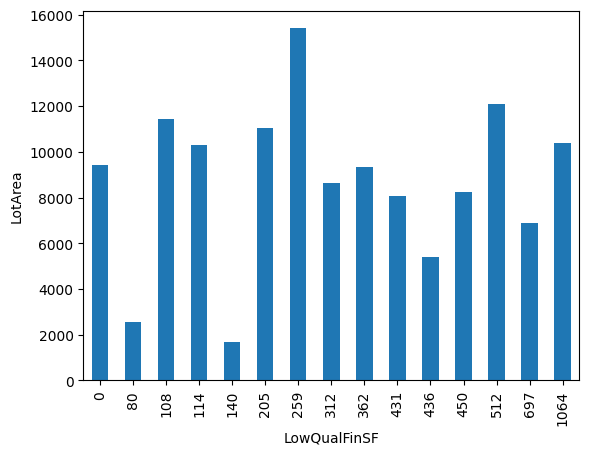

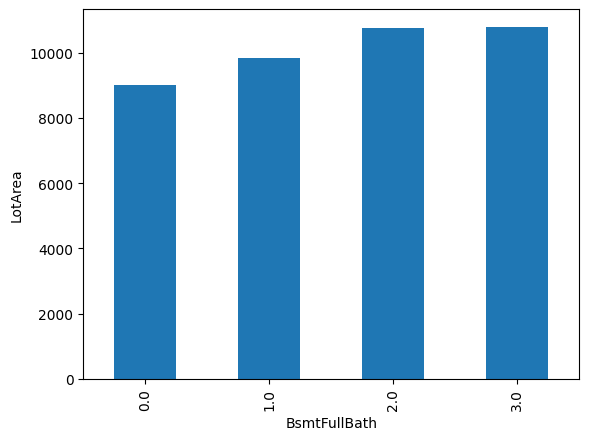

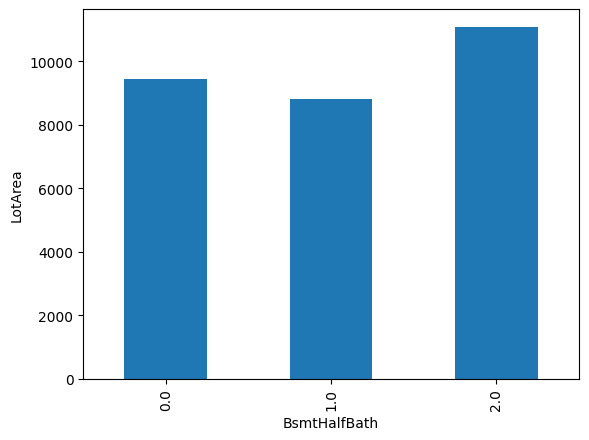

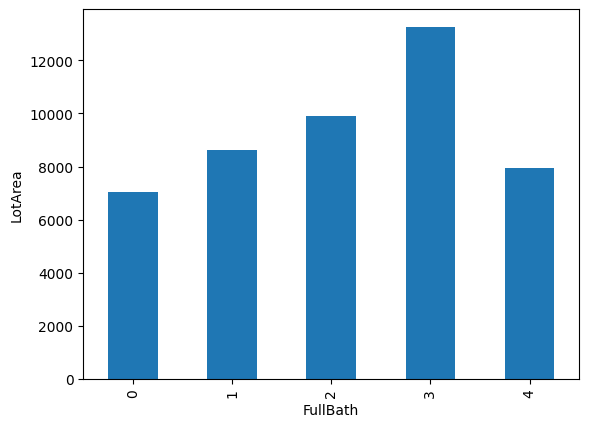

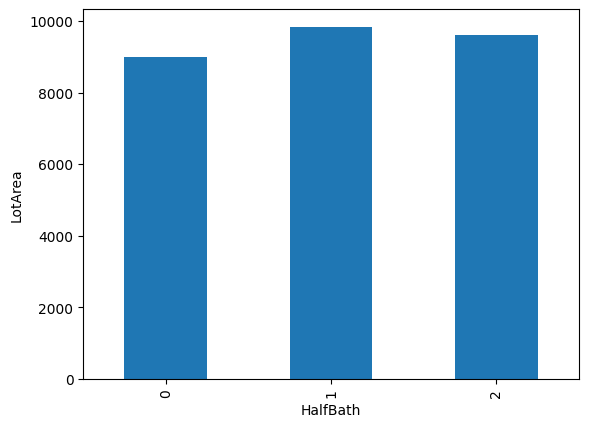

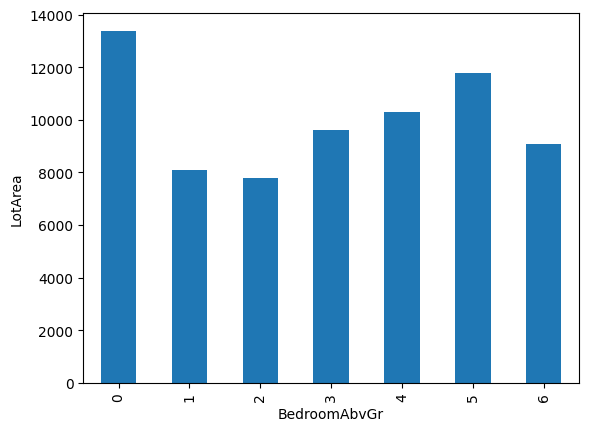

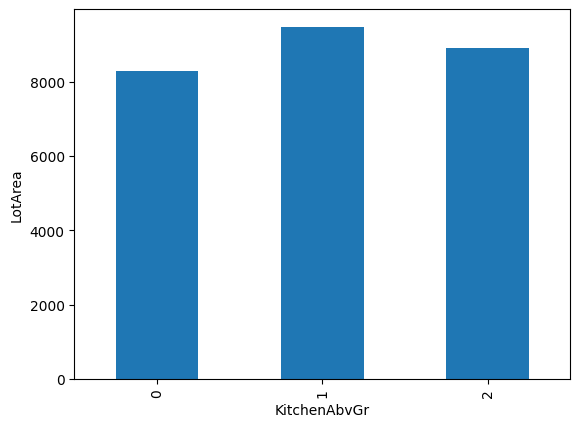

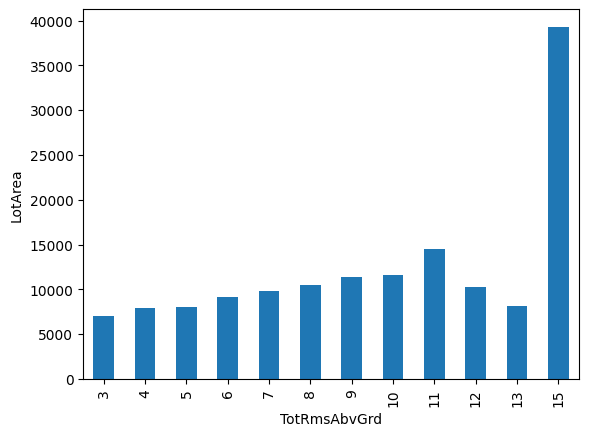

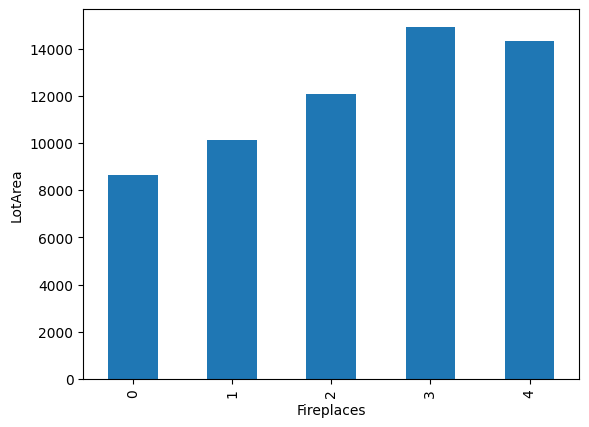

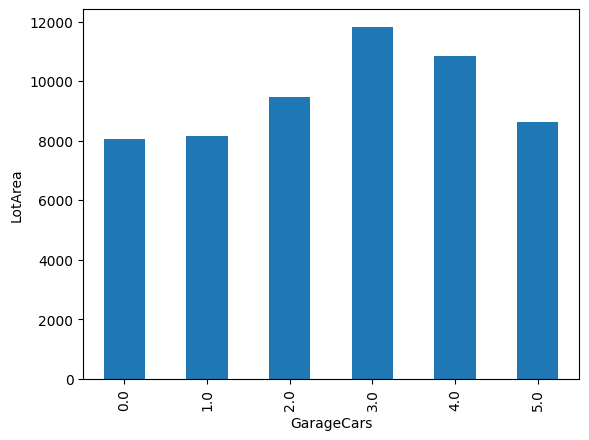

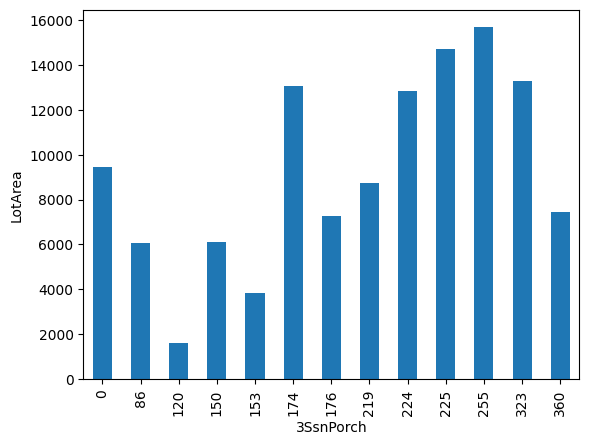

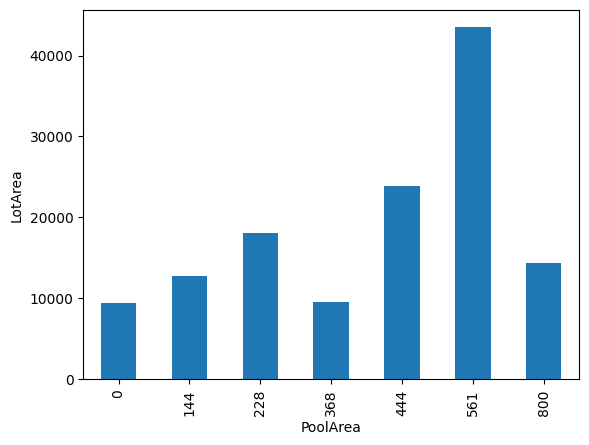

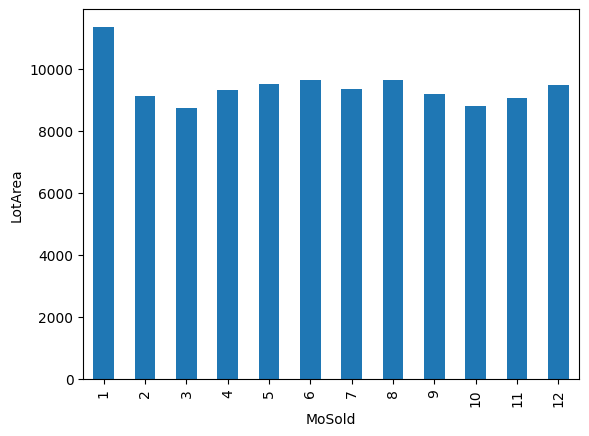

In [19]:
#relationship between SalePrice and discrete variables
for val in dis_val:
    data.groupby(val)['LotArea'].median().plot.bar()
    plt.xlabel(val)
    plt.ylabel('LotArea')
    plt.show()

In [20]:
#finding out the contineous variables
cont_val=[val for val in num_val if val not in dis_val+temp_val]
print(cont_val)
print("Continuous feature Count {}".format(len(cont_val)))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']
Continuous feature Count 16


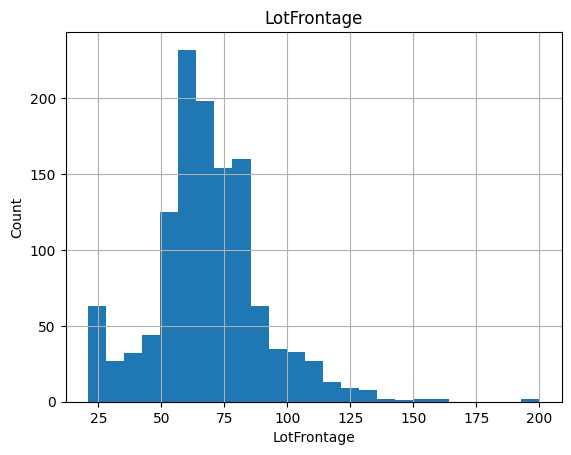

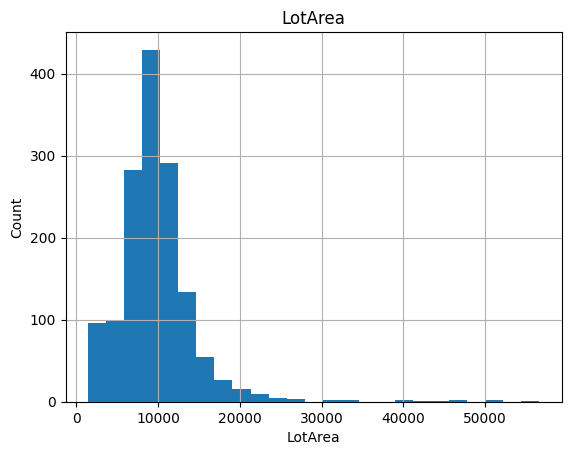

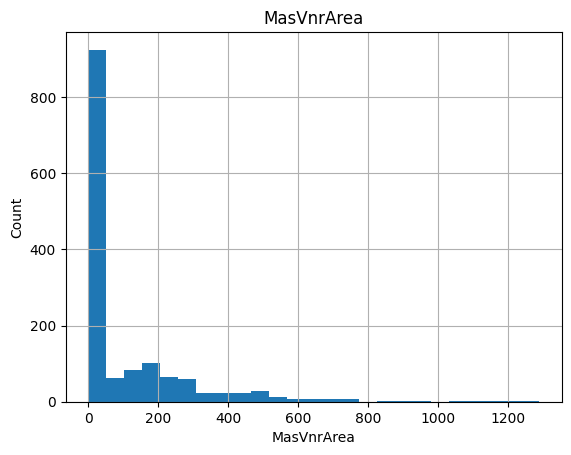

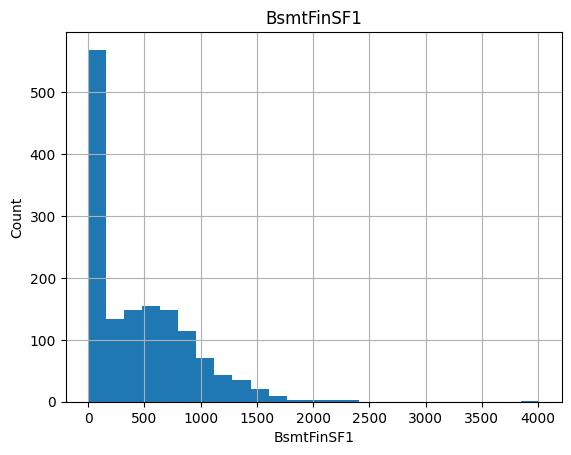

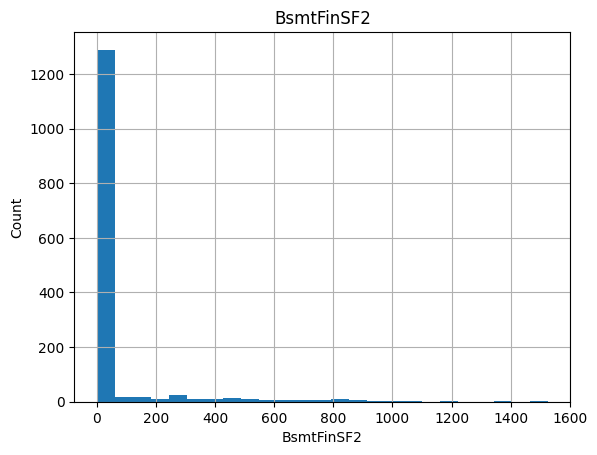

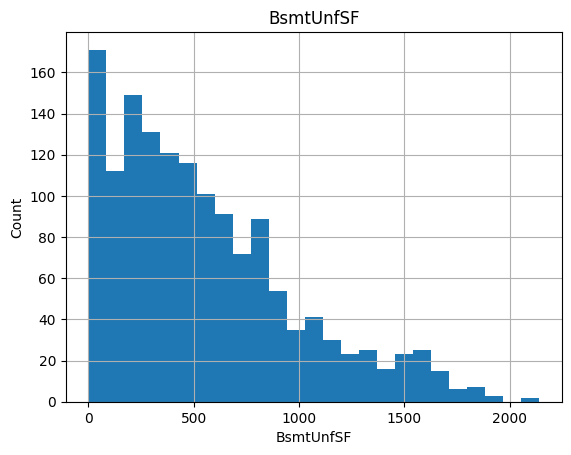

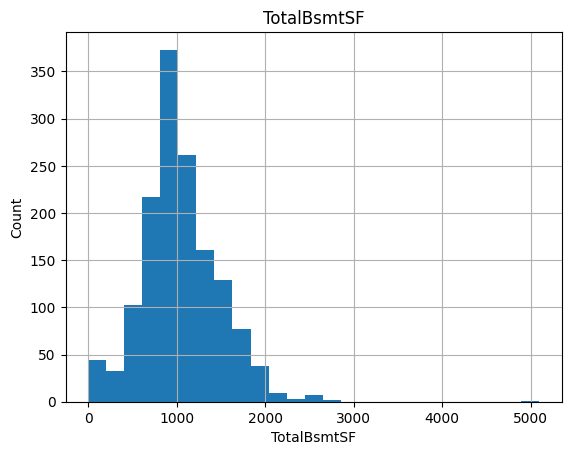

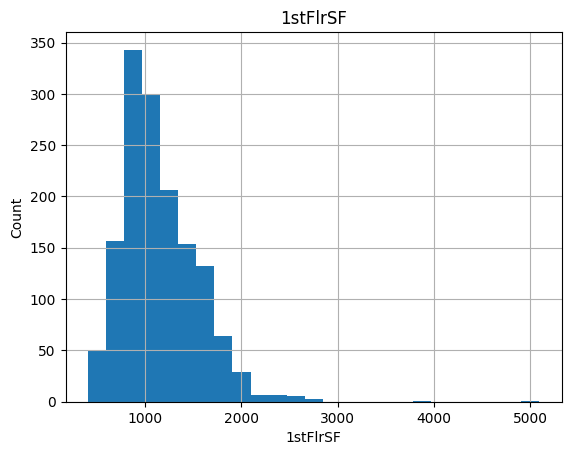

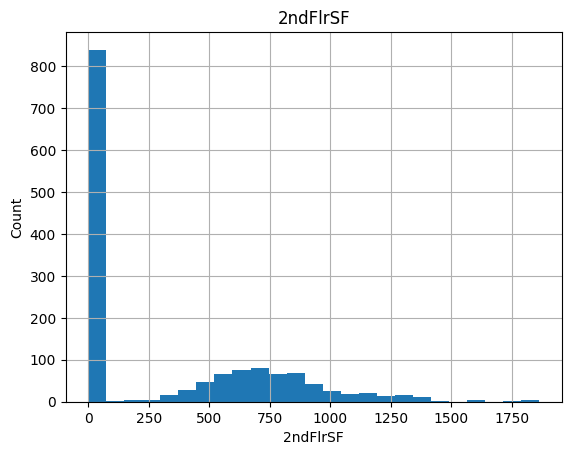

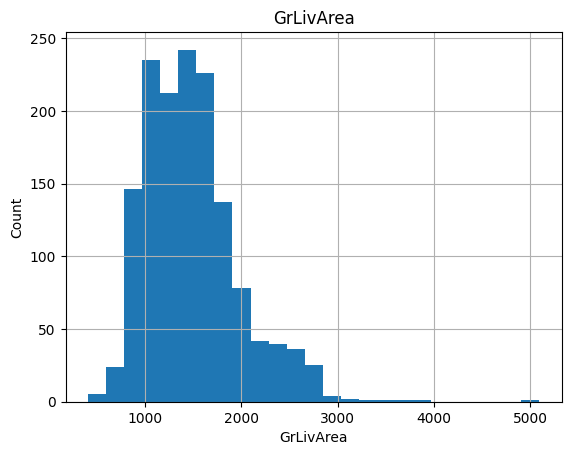

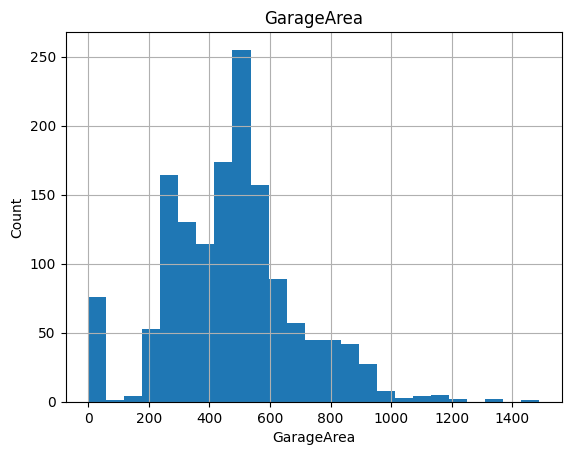

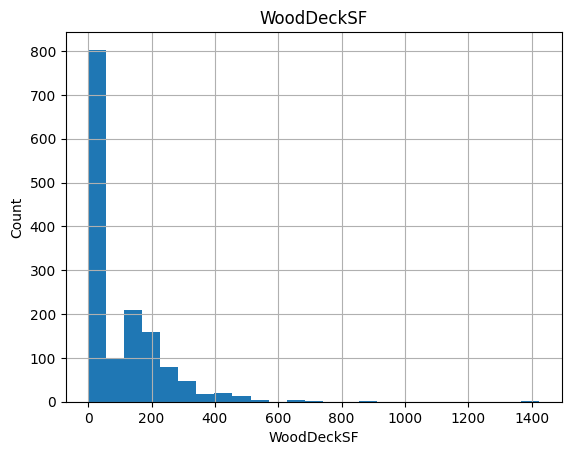

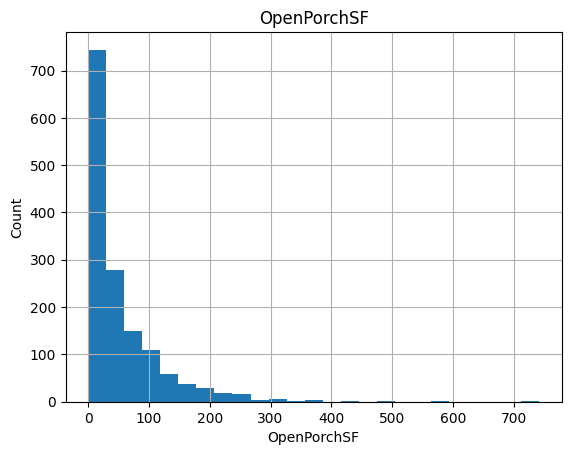

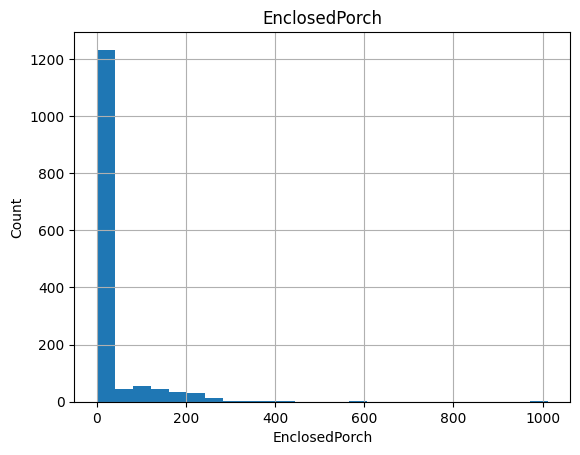

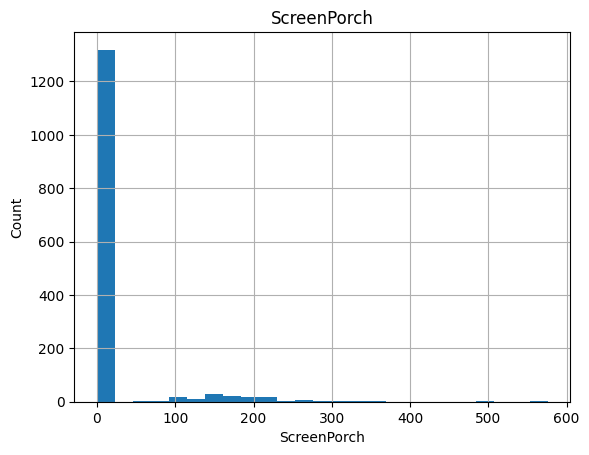

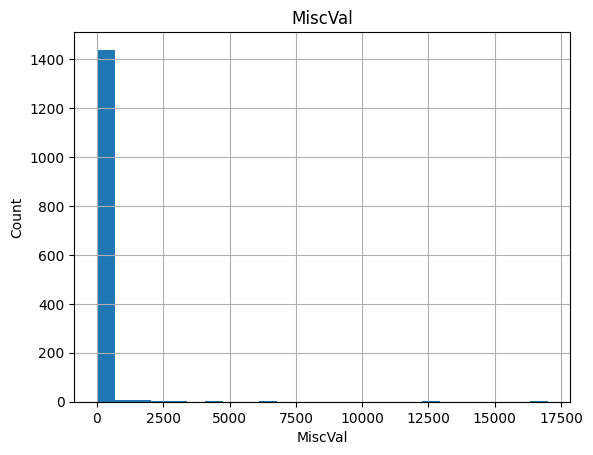

In [21]:
for val in cont_val:
    dataset=data.copy()
    data[val].hist(bins=25)
    plt.xlabel(val)
    plt.ylabel("Count")
    plt.title(val)
    plt.show()

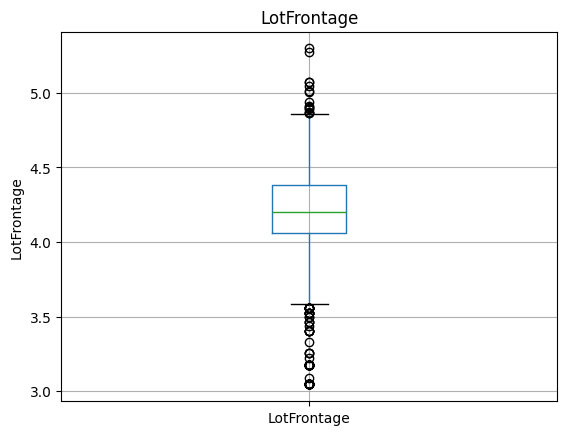

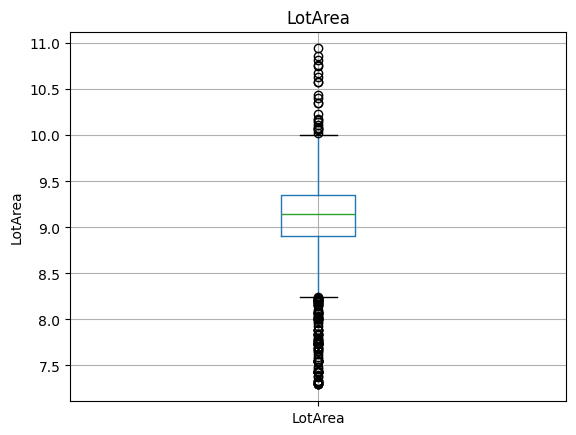

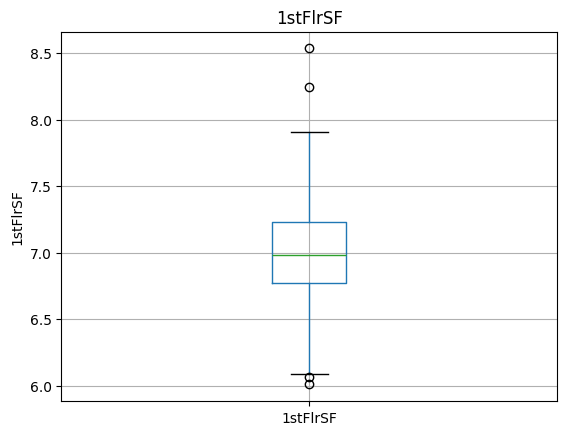

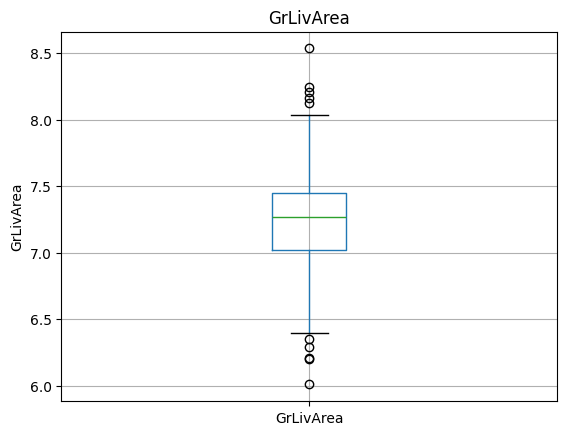

In [22]:
#finding the outliers
for val in cont_val:
    dataset=data.copy()
    if 0 in dataset[val].unique():
        pass
    else:
        dataset[val]=np.log(dataset[val])
        dataset.boxplot(column=val)
        plt.ylabel(val)
        plt.title(val)
        plt.show()

In [23]:
## Replacing the numerical Missing Values

for val in num_null_val:
    ## We will replace by using median since there are outliers
    median_value=data[val].median()
    
    ## create a new feature to capture nan values
    data[val+'nan']=np.where(data[val].isnull(),1,0)
    data[val].fillna(median_value,inplace=True)
    
data[num_null_val].isnull().sum()
    

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [24]:
data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave   NaN      Reg   
1   1462          20       RL         81.0    14267   Pave   NaN      IR1   
2   1463          60       RL         74.0    13830   Pave   NaN      IR1   
3   1464          60       RL         78.0     9978   Pave   NaN      IR1   
4   1465         120       RL         43.0     5005   Pave   NaN      IR1   
5   1466          60       RL         75.0    10000   Pave   NaN      IR1   
6   1467          20       RL         67.0     7980   Pave   NaN      IR1   
7   1468          60       RL         63.0     8402   Pave   NaN      IR1   
8   1469          20       RL         85.0    10176   Pave   NaN      Reg   
9   1470          20       RL         70.0     8400   Pave   NaN      Reg   
10  1471         120       RH         26.0     5858   Pave   NaN      IR1   
11  1472         160       RM         21.0     1680   Pave   NaN      Reg   
12  1473         160       RM         21.0     1680   Pave   NaN      Reg   
13  1474         160       RL         24.0     2280   Pave   NaN      Reg   
14  1475         120       RL         24.0     2280   Pave   NaN      Reg   
15  1476          60       RL        102.0    12858   Pave   NaN      IR1   
16  1477          20       RL         94.0    12883   Pave   NaN      IR1   
17  1478          20       RL         90.0    11520   Pave   NaN      Reg   
18  1479          20       RL         79.0    14122   Pave   NaN      IR1   
19  1480          20       RL        110.0    14300   Pave   NaN      Reg   
20  1481          60       RL        105.0    13650   Pave   NaN      Reg   
21  1482         120       RL         41.0     7132   Pave   NaN      IR1   
22  1483          20       RL        100.0    18494   Pave   NaN      IR1   
23  1484         120       RL         43.0     3203   Pave   NaN      Reg   
24  1485          80       RL         67.0    13300   Pave   NaN      IR1   
25  1486          60       RL         63.0     8577   Pave   NaN      IR1   
26  1487          60       RL         60.0    17433   Pave   NaN      IR2   
27  1488          20       RL         73.0     8987   Pave   NaN      Reg   
28  1489          20       FV         92.0     9215   Pave   NaN      Reg   
29  1490          20       FV         84.0    10440   Pave   NaN      Reg   
30  1491          60       RL         70.0    11920   Pave   NaN      Reg   
31  1492          30       RH         70.0     9800   Pave   NaN      Reg   
32  1493          20       RL         39.0    15410   Pave   NaN      IR1   
33  1494          60       RL         85.0    13143   Pave   NaN      IR1   
34  1495          60       RL         88.0    11134   Pave   NaN      Reg   
35  1496         120       FV         25.0     4835   Pave   NaN      IR1   
36  1497         160       FV         39.0     3515   Pave  Pave      Reg   
37  1498         160       FV         30.0     3215   Pave  Pave      Reg   
38  1499         160       FV         24.0     2544   Pave  Pave      Reg   
39  1500         160       FV         24.0     2544   Pave  Pave      Reg   
40  1501         160       FV         67.0     2980   Pave   NaN      Reg   
41  1502         160       FV         67.0     2403   Pave   NaN      IR1   
42  1503          20       FV         57.0    12853   Pave  Pave      IR1   
43  1504          60       FV         68.0     7379   Pave   NaN      IR1   
44  1505          20       FV         80.0     8000   Pave   NaN      Reg   
45  1506          20       RL         67.0    10456   Pave   NaN      IR1   
46  1507          60       RL         80.0    10791   Pave   NaN      Reg   
47  1508          50       RL         67.0    18837   Pave   NaN      IR1   
48  1509          60       RL         80.0     9600   Pave   NaN      Reg   
49  1510          20       RL         80.0     9600   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0     

In [25]:
for val in cat_val:
    data[val].fillna('Missing',inplace=True)
data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave  Missing      Reg   
1   1462          20       RL         81.0    14267   Pave  Missing      IR1   
2   1463          60       RL         74.0    13830   Pave  Missing      IR1   
3   1464          60       RL         78.0     9978   Pave  Missing      IR1   
4   1465         120       RL         43.0     5005   Pave  Missing      IR1   
5   1466          60       RL         75.0    10000   Pave  Missing      IR1   
6   1467          20       RL         67.0     7980   Pave  Missing      IR1   
7   1468          60       RL         63.0     8402   Pave  Missing      IR1   
8   1469          20       RL         85.0    10176   Pave  Missing      Reg   
9   1470          20       RL         70.0     8400   Pave  Missing      Reg   
10  1471         120       RH         26.0     5858   Pave  Missing      IR1   
11  1472         160       RM         21.0     1680   Pave  Missing      Reg   
12  1473         160       RM         21.0     1680   Pave  Missing      Reg   
13  1474         160       RL         24.0     2280   Pave  Missing      Reg   
14  1475         120       RL         24.0     2280   Pave  Missing      Reg   
15  1476          60       RL        102.0    12858   Pave  Missing      IR1   
16  1477          20       RL         94.0    12883   Pave  Missing      IR1   
17  1478          20       RL         90.0    11520   Pave  Missing      Reg   
18  1479          20       RL         79.0    14122   Pave  Missing      IR1   
19  1480          20       RL        110.0    14300   Pave  Missing      Reg   
20  1481          60       RL        105.0    13650   Pave  Missing      Reg   
21  1482         120       RL         41.0     7132   Pave  Missing      IR1   
22  1483          20       RL        100.0    18494   Pave  Missing      IR1   
23  1484         120       RL         43.0     3203   Pave  Missing      Reg   
24  1485          80       RL         67.0    13300   Pave  Missing      IR1   
25  1486          60       RL         63.0     8577   Pave  Missing      IR1   
26  1487          60       RL         60.0    17433   Pave  Missing      IR2   
27  1488          20       RL         73.0     8987   Pave  Missing      Reg   
28  1489          20       FV         92.0     9215   Pave  Missing      Reg   
29  1490          20       FV         84.0    10440   Pave  Missing      Reg   
30  1491          60       RL         70.0    11920   Pave  Missing      Reg   
31  1492          30       RH         70.0     9800   Pave  Missing      Reg   
32  1493          20       RL         39.0    15410   Pave  Missing      IR1   
33  1494          60       RL         85.0    13143   Pave  Missing      IR1   
34  1495          60       RL         88.0    11134   Pave  Missing      Reg   
35  1496         120       FV         25.0     4835   Pave  Missing      IR1   
36  1497         160       FV         39.0     3515   Pave     Pave      Reg   
37  1498         160       FV         30.0     3215   Pave     Pave      Reg   
38  1499         160       FV         24.0     2544   Pave     Pave      Reg   
39  1500         160       FV         24.0     2544   Pave     Pave      Reg   
40  1501         160       FV         67.0     2980   Pave  Missing      Reg   
41  1502         160       FV         67.0     2403   Pave  Missing      IR1   
42  1503          20       FV         57.0    12853   Pave     Pave      IR1   
43  1504          60       FV         68.0     7379   Pave  Missing      IR1   
44  1505          20       FV         80.0     8000   Pave  Missing      Reg   
45  1506          20       RL         67.0    10456   Pave  Missing      IR1   
46  1507          60       RL         80.0    10791   Pave  Missing      Reg   
47  1508          50       RL         67.0    18837   Pave  Missing      IR1   
48  1509          60       RL         80.0     9600   Pave  Missing      Reg   
49  15

In [26]:
## Temporal Variables (Date Time Variables)

for val in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']:
       
    data[val]=data['YrSold']-data[val]

In [27]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Missing      Reg   
1  1462          20       RL         81.0    14267   Pave  Missing      IR1   
2  1463          60       RL         74.0    13830   Pave  Missing      IR1   
3  1464          60       RL         78.0     9978   Pave  Missing      IR1   
4  1465         120       RL         43.0     5005   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6         49   
1       Norm     1Fam     1Story            6            6         52   
2       Norm     1Fam     2Story            5            5         13   
3       Norm     1Fam     2Story            6            6         12   
4       Norm   TwnhsE     1Story            8            5         18   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            49     Gable  CompShg     VinylSd     VinylSd    Missing   
1            52       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            12     Gable  CompShg     VinylSd     VinylSd    Missing   
3            12     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            18     Gable  CompShg     HdBoard     HdBoard    Missing   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0     Missing   
1             1          Gd             6        Typ           0     Missing   
2             1          TA             6        Typ           1          TA   
3          

In [28]:
dataset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0       1961          1961       1961.0
1       1958          1958       1958.0
2       1997          1998       1997.0
3       1998          1998       1998.0
4       1992          1992       1992.0

In [29]:
#converting the values into gaussian values for training and testing, 'SalePrice']

num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for val in num_features:
    data[val]=np.log(data[val])

In [30]:
data.head(50)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1461          20       RH     4.382027  9.360655   Pave  Missing      Reg   
1   1462          20       RL     4.394449  9.565704   Pave  Missing      IR1   
2   1463          60       RL     4.304065  9.534595   Pave  Missing      IR1   
3   1464          60       RL     4.356709  9.208138   Pave  Missing      IR1   
4   1465         120       RL     3.761200  8.518193   Pave  Missing      IR1   
5   1466          60       RL     4.317488  9.210340   Pave  Missing      IR1   
6   1467          20       RL     4.204693  8.984694   Pave  Missing      IR1   
7   1468          60       RL     4.143135  9.036225   Pave  Missing      IR1   
8   1469          20       RL     4.442651  9.227787   Pave  Missing      Reg   
9   1470          20       RL     4.248495  9.035987   Pave  Missing      Reg   
10  1471         120       RH     3.258097  8.675564   Pave  Missing      IR1   
11  1472         160       RM     3.044522  7.426549   Pave  Missing      Reg   
12  1473         160       RM     3.044522  7.426549   Pave  Missing      Reg   
13  1474         160       RL     3.178054  7.731931   Pave  Missing      Reg   
14  1475         120       RL     3.178054  7.731931   Pave  Missing      Reg   
15  1476          60       RL     4.624973  9.461721   Pave  Missing      IR1   
16  1477          20       RL     4.543295  9.463664   Pave  Missing      IR1   
17  1478          20       RL     4.499810  9.351840   Pave  Missing      Reg   
18  1479          20       RL     4.369448  9.555489   Pave  Missing      IR1   
19  1480          20       RL     4.700480  9.568015   Pave  Missing      Reg   
20  1481          60       RL     4.653960  9.521495   Pave  Missing      Reg   
21  1482         120       RL     3.713572  8.872347   Pave  Missing      IR1   
22  1483          20       RL     4.605170  9.825202   Pave  Missing      IR1   
23  1484         120       RL     3.761200  8.071843   Pave  Missing      Reg   
24  1485          80       RL     4.204693  9.495519   Pave  Missing      IR1   
25  1486          60       RL     4.143135  9.056839   Pave  Missing      IR1   
26  1487          60       RL     4.094345  9.766120   Pave  Missing      IR2   
27  1488          20       RL     4.290459  9.103534   Pave  Missing      Reg   
28  1489          20       FV     4.521789  9.128588   Pave  Missing      Reg   
29  1490          20       FV     4.430817  9.253400   Pave  Missing      Reg   
30  1491          60       RL     4.248495  9.385973   Pave  Missing      Reg   
31  1492          30       RH     4.248495  9.190138   Pave  Missing      Reg   
32  1493          20       RL     3.663562  9.642772   Pave  Missing      IR1   
33  1494          60       RL     4.442651  9.483645   Pave  Missing      IR1   
34  1495          60       RL     4.477337  9.317759   Pave  Missing      Reg   
35  1496         120       FV     3.218876  8.483636   Pave  Missing      IR1   
36  1497         160       FV     3.663562  8.164795   Pave     Pave      Reg   
37  1498         160       FV     3.401197  8.075583   Pave     Pave      Reg   
38  1499         160       FV     3.178054  7.841493   Pave     Pave      Reg   
39  1500         160       FV     3.178054  7.841493   Pave     Pave      Reg   
40  1501         160       FV     4.204693  7.999679   Pave  Missing      Reg   
41  1502         160       FV     4.204693  7.784473   Pave  Missing      IR1   
42  1503          20       FV     4.043051  9.461333   Pave     Pave      IR1   
43  1504          60       FV     4.219508  8.906393   Pave  Missing      IR1   
44  1505          20       FV     4.382027  8.987197   Pave  Missing      Reg   
45  1506          20       RL     4.204693  9.254931   Pave  Missing      IR1   
46  1507          60       RL     4.382027  9.286468   Pave  Missing      Reg   
47  1508          50       RL     4.204693  9.843578   Pave  Missing      IR1   
48  1509          60       RL     4.3

In [31]:
#finding the rare catogorical values
for val in cat_val:
    temp=data.groupby(val)['LotArea'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[val]=np.where(data[val].isin(temp_df),data[val],'Rare_var')

In [32]:
data.head(100)

Id  MSSubClass  MSZoning  LotFrontage   LotArea Street    Alley  \
0   1461          20  Rare_var     4.382027  9.360655   Pave  Missing   
1   1462          20        RL     4.394449  9.565704   Pave  Missing   
2   1463          60        RL     4.304065  9.534595   Pave  Missing   
3   1464          60        RL     4.356709  9.208138   Pave  Missing   
4   1465         120        RL     3.761200  8.518193   Pave  Missing   
..   ...         ...       ...          ...       ...    ...      ...   
95  1556          50        RL     4.276666  9.271624   Pave  Missing   
96  1557         190        RL     4.094345  9.200290   Pave  Missing   
97  1558          50        RL     4.174387  8.699681   Pave  Missing   
98  1559          70   C (all)     4.204693  8.771680   Pave  Missing   
99  1560         190  Rare_var     4.094345  8.707483   Pave  Missing   

   LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0       Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1       IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2       IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3       IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4       IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm   
..      ...         ...       ...       ...       ...          ...        ...   
95      IR1         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   
96      Reg         Lvl    AllPub    Inside       Gtl        SWISU       Norm   
97      IR1         Bnk    AllPub    Inside       Mod        SWISU       Norm   
98      IR1         Lvl    AllPub    Inside       Gtl        SWISU       Norm   
99      Reg         Lvl    AllPub    Corner       Gtl        SWISU     Artery   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     1Story            5            6         49   
1        Norm     1Fam     1Story            6            6         52   
2        Norm     1Fam     2Story            5            5         13   
3        Norm     1Fam     2Story            6            6         12   
4        Norm   TwnhsE     1Story            8            5         18   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     1.5Fin            5            3         93   
96       Norm   2fmCon     1.5Fin            5            4         95   
97       Norm     1Fam     1.5Fin            6            5         70   
98       Norm     1Fam     2Story            4            1        103   
99       Norm   2fmCon     1.5Fin            5            7        100   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             49     Gable  CompShg     VinylSd     VinylSd    Missing   
1             52       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             12     Gable  CompShg     VinylSd     VinylSd    Missing   
3             12     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             18     Gable  CompShg     HdBoard     HdBoard    Missing   
..           ...       ...      ...         ...         ...        ...   
95            60     Gable  CompShg     Wd Sdng     Wd Sdng    Missing   
96            60     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
97            60     Gable  CompShg     VinylSd     VinylSd    Missing   
98            60  Rare_var  CompShg     Wd Sdng      Stucco    Missing   
99            60     Gable  CompShg     Wd Sdng     Wd Sdng    Missing   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0          0.0        TA        TA     CBlock       TA       TA           No   
1        108.0        TA        TA     CBlock       TA       TA           No   
2          0.0        TA        TA      PConc       Gd       TA           No   
3         20.0        TA        TA      PConc       TA    

In [33]:
#replacing catagorical values with labels
for val in cat_val:
    labels_ordered=data.groupby([val])['LotArea'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[val]=data[val].map(labels_ordered)

In [34]:
data.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0  1461          20         4     4.382027  9.360655       0      2         0   
1  1462          20         3     4.394449  9.565704       0      2         1   
2  1463          60         3     4.304065  9.534595       0      2         1   
3  1464          60         3     4.356709  9.208138       0      2         1   
4  1465         120         3     3.761200  8.518193       0      2         1   
5  1466          60         3     4.317488  9.210340       0      2         1   
6  1467          20         3     4.204693  8.984694       0      2         1   
7  1468          60         3     4.143135  9.036225       0      2         1   
8  1469          20         3     4.442651  9.227787       0      2         0   
9  1470          20         3     4.248495  9.035987       0      2         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          1          0             8           2   
1            0          0          2          0             8           1   
2            0          0          1          0            14           1   
3            0          0          1          0            14           1   
4            1          0          1          0            11           1   
5            0          0          2          0            14           1   
6            0          0          1          0            14           1   
7            0          0          1          0            14           1   
8            0          0          1          0            14           1   
9            0          0          2          0             8           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         4           4            5            6         49   
1           0         4           4            6            6         52   
2           0         4           1            5            5         13   
3           0         4           1            6            6         12   
4           0         1           4            8            5         18   
5           0         4           1            6            5         17   
6           0         4           4            6            7         18   
7           0         4           1            6            5         12   
8           0         4           4            7            5         20   
9           0         4           4            4            5         40   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            49          0         0            8            8           0   
1            52          2         0            7            7           2   
2            12          0         0            8            8           0   
3            12          0         0            8            8           2   
4            18          0         0            5            6           0   
5            16          0         0            5            6           0   
6             3          0         0            5            6           0   
7            12          0         0            8            8           0   
8            20          0         0            5            6           0   
9            40          0         0            6            9           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          0          0           2         1         1   
1       108.0          0          0           2         1         1   
2         0.0          0          0           3         2         1   
3        20.0          0          0           3         1         1   
4         0.0          2          0           3         2         1   
5         0.0          0          0           3         2         1   
6         0.0          0          1           3         2         1   
7

In [35]:
scaling_feature=[val for val in data.columns if val not in ['Id','SalePerice'] ]
print(len(scaling_feature))
print(scaling_feature)

90
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', '

In [36]:
#feature scaling

feature_scale=[val for val in data.columns if val not in ['Id','LotArea']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [37]:
scaler.transform(data[feature_scale])

array([[0.        , 1.        , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.75      , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.75      , 0.48035069, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
# transform the train and test set, and add on the Id and SalePrice variables
data_fin = pd.concat([data[['Id', 'LotArea']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [39]:
data_fin.head()

Id   LotArea  MSSubClass  MSZoning  LotFrontage  Street  Alley  LotShape  \
0  1461  9.360655    0.000000      1.00     0.593445     0.0    1.0  0.000000   
1  1462  9.565704    0.000000      0.75     0.598957     0.0    1.0  0.333333   
2  1463  9.534595    0.235294      0.75     0.558854     0.0    1.0  0.333333   
3  1464  9.208138    0.235294      0.75     0.582212     0.0    1.0  0.333333   
4  1465  8.518193    0.588235      0.75     0.317987     0.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     0.000000        0.0       0.25        0.0          0.40    0.333333   
1     0.000000        0.0       0.50        0.0          0.40    0.166667   
2     0.000000        0.0       0.25        0.0          0.70    0.166667   
3     0.000000        0.0       0.25        0.0          0.70    0.166667   
4     0.333333        0.0       0.25        0.0          0.55    0.166667   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         0.0      1.00         0.8     0.444444        0.625   0.384615   
1         0.0      1.00         0.8     0.555556        0.625   0.407692   
2         0.0      1.00         0.2     0.444444        0.500   0.107692   
3         0.0      1.00         0.2     0.555556        0.625   0.100000   
4         0.0      0.25         0.8     0.777778        0.500   0.146154   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.822581        0.0       0.0          0.8     0.727273    0.000000   
1      0.870968        1.0       0.0          0.7     0.636364    0.666667   
2      0.225806        0.0       0.0          0.8     0.727273    0.000000   
3      0.225806        0.0       0.0          0.8     0.727273    0.666667   
4      0.322581        0.0       0.0          0.5     0.545455    0.000000   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.000000   0.000000        0.0        0.50      0.25      0.25   
1    0.083721   0.000000        0.0        0.50      0.25      0.25   
2    0.000000   0.000000        0.0        0.75      0.50      0.25   
3    0.015504   0.000000        0.0        0.75      0.25      0.25   
4    0.000000   0.666667        0.0        0.75      0.50      0.25   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0           0.0      0.166667    0.116708      0.166667    0.094364   
1           0.0      0.666667    0.230175      0.000000    0.000000   
2           0.0      0.500000    0.197257      0.000000    0.000000   
3           0.0      0.500000    0.150125      0.000000    0.000000   
4           0.0      0.666667    0.065586      0.000000    0.000000   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.126168     0.173111      0.0       0.25         1.0         1.0   
1   0.189720     0.260844      0.0       0.25         1.0         1.0   
2   0.064019     0.182139      0.0       0.00         1.0         1.0   
3   0.151402     0.181747      0.0       0.50         1.0         1.0   
4   0.475234     0.251227      0.0       0.50         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.312253  0.000000           0.0   0.312253           0.0           0.0   
1  0.468253  0.000000           0.0   0.468253           0.0           0.0   
2  0.326139  0.376477           0.0   0.548792           0.0           0.0   
3  0.325285  0.364125           0.0   0.542672           0.0           0.0   
4  0.453388  0.000000           0.0   0.453388           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      0.25       0.0      0.333333           0.5          0.0      0.166667   
1      0.25       0.5      0.500000           0.5          0.5      0.250000   
2      0.50       0.5      0.500000           0.5          0.0      0.250000   
3      0.50       0.5      0.500000           0

In [40]:
data.to_csv('X_test_final.csv',index=False)

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [42]:
dataset=pd.read_csv('X_test_final.csv')

In [43]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0  1461          20         4     4.382027  9.360655       0      2         0   
1  1462          20         3     4.394449  9.565704       0      2         1   
2  1463          60         3     4.304065  9.534595       0      2         1   
3  1464          60         3     4.356709  9.208138       0      2         1   
4  1465         120         3     3.761200  8.518193       0      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          1          0             8           2   
1            0          0          2          0             8           1   
2            0          0          1          0            14           1   
3            0          0          1          0            14           1   
4            1          0          1          0            11           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         4           4            5            6         49   
1           0         4           4            6            6         52   
2           0         4           1            5            5         13   
3           0         4           1            6            6         12   
4           0         1           4            8            5         18   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            49          0         0            8            8           0   
1            52          2         0            7            7           2   
2            12          0         0            8            8           0   
3            12          0         0            8            8           2   
4            18          0         0            5            6           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          0          0           2         1         1   
1       108.0          0          0           2         1         1   
2         0.0          0          0           3         2         1   
3        20.0          0          0           3         1         1   
4         0.0          2          0           3         2         1   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             0             1       468.0             1       144.0   
1             0             4       923.0             0         0.0   
2             0             3       791.0             0         0.0   
3             0             3       602.0             0         0.0   
4             0             4       263.0             0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        0          1           1           3   
1      406.0       1329.0        0          1           1           3   
2      137.0        928.0        0          0           1           3   
3      324.0        926.0        0          2           1           3   
4     1017.0       1280.0        0          2           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.797940         0             0   6.797940           0.0           0.0   
1  7.192182         0             0   7.192182           0.0           0.0   
2  6.833032       701             0   7.395722           0.0           0.0   
3  6.830874       678             0   7.380256           0.0           0.0   
4  7.154615         0             0   7.154615           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            0             5   
1         1         1             3             1            2             6   
2         2         1             3             1            0             6   
3         2         1             3            

In [44]:
## Capture the dependent feature
y_test=dataset[['LotArea']]
## drop dependent feature from dataset
X_test=dataset.drop(['Id','LotArea'],axis=1)

In [45]:
X_test

MSSubClass  MSZoning  LotFrontage  Street  Alley  LotShape  LandContour  \
0             20         4     4.382027       0      2         0            0   
1             20         3     4.394449       0      2         1            0   
2             60         3     4.304065       0      2         1            0   
3             60         3     4.356709       0      2         1            0   
4            120         3     3.761200       0      2         1            1   
...          ...       ...          ...     ...    ...       ...          ...   
1454         160         0     3.044522       0      2         0            0   
1455         160         0     3.044522       0      2         0            0   
1456          20         3     5.075174       0      2         0            0   
1457          85         3     4.127134       0      2         0            0   
1458          60         3     4.304065       0      2         0            0   

      Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0             0          1          0             8           2           0   
1             0          2          0             8           1           0   
2             0          1          0            14           1           0   
3             0          1          0            14           1           0   
4             0          1          0            11           1           0   
...         ...        ...        ...           ...         ...         ...   
1454          0          1          0             0           1           0   
1455          0          1          0             0           1           0   
1456          0          1          0            18           1           0   
1457          0          1          0            18           1           0   
1458          0          1          1            18           1           0   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            4           4            5            6         49            49   
1            4           4            6            6         52            52   
2            4           1            5            5         13            12   
3            4           1            6            6         12            12   
4            1           4            8            5         18            18   
...        ...         ...          ...          ...        ...           ...   
1454         0           1            4            7         36            36   
1455         1           1            4            5         36            36   
1456         4           4            5            7         46            10   
1457         4           0            5            5         14            14   
1458         4           1            7            5         13            12   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0             0         0            8            8           0         0.0   
1             2         0            7            7           2       108.0   
2             0         0            8            8           0         0.0   
3             0         0            8            8           2        20.0   
4             0         0            5            6           0         0.0   
...         ...       ...          ...          ...         ...         ...   
1454          0         0            0            1           0         0.0   
1455          0         0            0            1           0         0.0   
1456          0         0            8            8           0         0.0   
1457          0         0            5            5           0         0.0   
1458          0         0            5            6           2        94.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0             0          0           2         1         1             0   
1         

In [46]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_test, y_test)

/opt/tljh/user/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.966e+01, tolerance: 3.675e-02
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [47]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False])

In [48]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_test.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_test.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 89
selected features: 47
features with coefficients shrank to zero: 41


In [49]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SaleCondition'],
      dtype='object')

In [50]:
X_test=X_test[selected_feat]
X_test.head()

MSSubClass  MSZoning  LotFrontage  LotShape  LandContour  LotConfig  \
0          20         4     4.382027         0            0          1   
1          20         3     4.394449         1            0          2   
2          60         3     4.304065         1            0          1   
3          60         3     4.356709         1            0          1   
4         120         3     3.761200         1            1          1   

   Neighborhood  Condition1  BldgType  HouseStyle  OverallQual  OverallCond  \
0             8           2         4           4            5            6   
1             8           1         4           4            6            6   
2            14           1         4           1            5            5   
3            14           1         4           1            6            6   
4            11           1         1           4            8            5   

   YearBuilt  YearRemodAdd  Exterior2nd  MasVnrType  ExterCond  Foundation  \
0         49            49            8           0          0           2   
1         52            52            7           2          0           2   
2         13            12            8           0          0           3   
3         12            12            8           2          0           3   
4         18            18            6           0          0           3   

   BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0         1             0       468.0             1       144.0      270.0   
1         1             0       923.0             0         0.0      406.0   
2         1             0       791.0             0         0.0      137.0   
3         1             0       602.0             0         0.0      324.0   
4         1             0       263.0             0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  FullBath  \
0        882.0  6.797940         0             0           0.0         1   
1       1329.0  7.192182         0             0           0.0         1   
2        928.0  6.833032       701             0           0.0         2   
3        926.0  6.830874       678             0           0.0         2   
4       1280.0  7.154615         0             0           0.0         2   

   HalfBath  TotRmsAbvGrd  Functional  GarageType  GarageYrBlt  GarageFinish  \
0         0             5           0           4         49.0             1   
1         1             6           0           4         52.0             1   
2         1             6           0           4         13.0             3   
3         1             7           0           4         12.0             3   
4         0             5           0           4         18.0             2   

   GarageArea  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       730.0           2         140            0              0          0   
1       312.0           2         393           36              0          0   
2       482.0           2         212           34              0          0   
3       470.0           2         360           36              0          0   
4       506.0           2           0           82              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  SaleCondition  
0          120         0        0       6              0  
1            0         0    12500       6              0  
2            0         0        0       3              0  
3            0         0        0       6              0  
4          144         0        0       1              0